<a href="https://colab.research.google.com/github/su-00/Graduation-portfolio/blob/main/%EC%82%B0%ED%95%99%ED%98%91%EB%A0%A5(%EB%B3%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd gdrive

/content/gdrive


In [ ]:
cd My Drive/산학협력

/content/gdrive/My Drive/산학협력


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

data = pd.read_csv('./noin.csv')

In [ ]:
features = data.columns

In [ ]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

Outliers_to_drop = detect_outliers(data,2,features)

In [ ]:
data.loc[Outliers_to_drop]

,PERSON_ID,SEX,AGE,SIDO,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,DFAB_REG_YM,Stroke,AF,CAD,Cancer,DM,HF,HTN,aad,anticoagulant,antiplatelet_agent,cardiotonics,statin,HCHK_YEAR,HME_DT,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,HCHK_APOP_PMH_YN,HCHK_DIABML_PMH_YN,HCHK_ETCDSE_PMH_YN,HCHK_HDISE_PMH_YN,HCHK_HPLPDM_PMH_YN,HCHK_HPRTS_PMH_YN,HCHK_PHSS_PMH_YN,FMLY_APOP_PATIEN_YN,FMLY_CANCER_PATIEN_YN,FMLY_DIABML_PATIEN_YN,FMLY_HDISE_PATIEN_YN,FMLY_HPRTS_PATIEN_YN,SMK_STAT_TYPE_RSPS_CD,PAST_SMK_TERM_RSPS_CD,PAST_DSQTY_RSPS_CD,CUR_SMK_TERM_RSPS_CD,CUR_DSQTY_RSPS_CD,DRNK_HABIT_RSPS_CD,TM1_DRKQTY_RSPS_CD,MOV20_WEK_FREQ_ID,MOV30_WEK_FREQ_ID,WLK30_WEK_FREQ_ID,KDSQ_C,KDSQ_C_1,KDSQ_C_2,KDSQ_C_3,KDSQ_C_4,KDSQ_C_5
0,10306739,2,100,29,6,8,2,1,200910.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2009,20090804.0,141.0,40.0,71.0,119.0,70.0,136.0,165.0,149.0,37.0,98.0,10.5,NaN,0.6,18.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,10600477,2,98,44,1,1,2,1,200410.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2009,20090825.0,146.0,49.0,80.0,139.0,70.0,89.0,233.0,139.0,83.0,122.0,12.4,1.0,0.9,22.0,16.0,25.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,10849173,1,100,46,1,1,0,0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012,20120629.0,164.0,46.0,71.0,168.0,86.0,90.0,234.0,80.0,54.0,164.0,11.9,1.0,1.1,25.0,18.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,11113925,1,97,45,6,10,2,4,200405.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2010,20101223.0,157.0,55.0,77.0,130.0,80.0,98.0,141.0,95.0,33.0,89.0,13.0,1.0,1.1,49.0,18.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
12,11391007,2,95,45,6,2,1,3,199902.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,20090810.0,132.0,32.0,65.0,120.0,80.0,141.0,178.0,189.0,46.0,94.0,8.6,1.0,0.8,22.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238635,98565862,1,70,11,6,9,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2012,20120423.0,159.0,73.0,90.0,136.0,80.0,125.0,243.0,140.0,64.0,151.0,16.0,1.0,0.9,67.0,131.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
241320,99257231,2,70,42,6,9,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2012,20120228.0,146.0,71.0,83.0,120.0,80.0,105.0,211.0,124.0,57.0,129.0,16.8,1.0,0.6,17.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
241339,99262268,1,70,41,5,3,0,0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2012,20120516.0,170.0,65.0,84.0,179.0,101.0,148.0,177.0,84.0,61.0,99.0,16.3,1.0,0.7,18.0,20.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,4.0,6.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0
243527,99825559,1,70,41,2,4,0,0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2012,20121010.0,162.0,65.0,80.0,138.0,73.0,98.0,213.0,94.0,72.0,122.0,14.4,1.0,1.1,25.0,23.0,30.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,10.0,NaN,NaN,3.0,4.0,6.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
def missing_values_table(df):
    #Total missing values
    mis_val = df.isnull().sum()

    #Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    #Make a tale with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    #Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending = False).round(1)

    #Print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + " columns. \n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    #Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
#Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(45)

Your selected dataframe has 67 columns. 
There are 45 columns that have missing values.


,Missing Values,% of Total Values
DFAB_REG_YM,242978,99.5
CUR_DSQTY_RSPS_CD,216849,88.8
CUR_SMK_TERM_RSPS_CD,216849,88.8
PAST_SMK_TERM_RSPS_CD,209960,86.0
PAST_DSQTY_RSPS_CD,209960,86.0
KDSQ_C,179901,73.7
KDSQ_C_1,179799,73.6
KDSQ_C_5,179770,73.6
KDSQ_C_4,179745,73.6
KDSQ_C_3,179743,73.6


In [ ]:
#No duplicated values
print("{} duplicated values in data".format(data.duplicated().sum()))

0 duplicated values in data


In [ ]:
#drop DFAB_REG_YM (too many missing values), PERSON_ID
data = data.drop(['DFAB_REG_YM'], axis=1)
data = data.drop(['PERSON_ID'], axis =1)

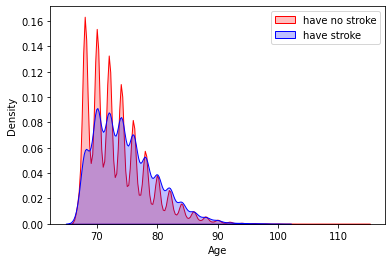

In [ ]:
#Age distribution
g = sns.kdeplot(data['AGE'][(data['Stroke'] == 0) & (data['AGE'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(data['AGE'][(data['Stroke'] == 1) & (data['AGE'].notnull())], color = 'Blue', shade = True)
g.set_xlabel('Age')
g = g.legend(['have no stroke', 'have stroke'])

In [ ]:
data['AGE'].value_counts()

68     40239
70     38661
72     33608
74     28291
76     21244
78     15004
80     10102
69      7311
82      7081
71      7041
73      5631
75      4540
84      4234
67      4192
77      3587
86      2601
79      2542
81      1754
88      1510
83      1273
90       830
85       818
87       536
92       415
89       334
94       201
91       179
96       124
93        96
98        52
95        51
97        31
100       25
99        11
102        9
101        6
107        2
103        2
109        1
104        1
114        1
Name: AGE, dtype: int64

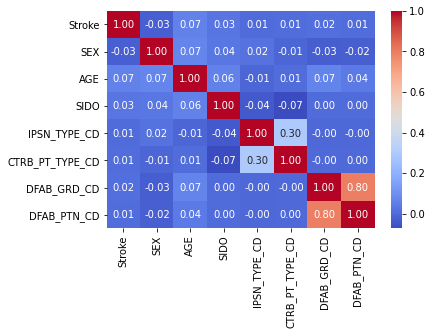

In [ ]:
#환자기본정보와 Stroke
g = sns.heatmap(data[['Stroke', 'SEX', 'AGE', 'SIDO', 'IPSN_TYPE_CD', 'CTRB_PT_TYPE_CD', 'DFAB_GRD_CD', 'DFAB_PTN_CD']].corr(), annot=True, fmt=".2f", cmap="coolwarm")


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


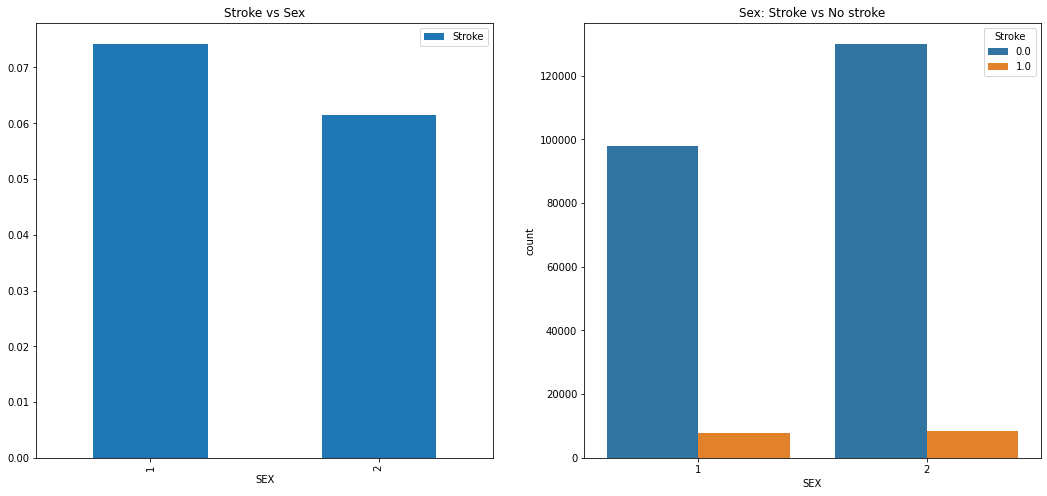

In [ ]:
#explore sex vs stroke
#male > female
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Stroke', 'SEX']].groupby(['SEX'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Stroke vs Sex')
sns.countplot('SEX', hue='Stroke', data=data, ax=ax[1])
ax[1].set_title('Sex: Stroke vs No stroke')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


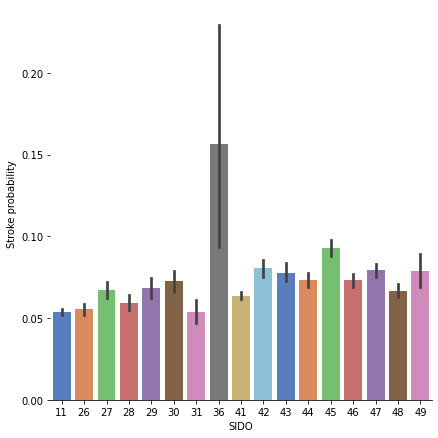

In [ ]:
#SIDO vs Storke
g = sns.factorplot(x='SIDO', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


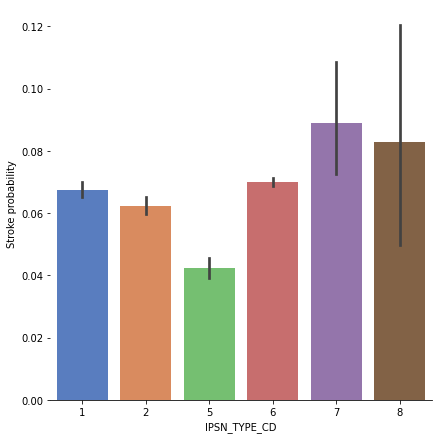

In [ ]:
#IPSN_TYPE_CD vs Stroke
g = sns.factorplot(x='IPSN_TYPE_CD', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


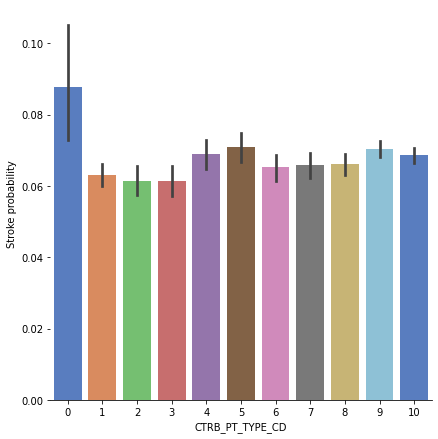

In [ ]:
#CTRB_PT_TYPE_CD
g = sns.factorplot(x='CTRB_PT_TYPE_CD', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


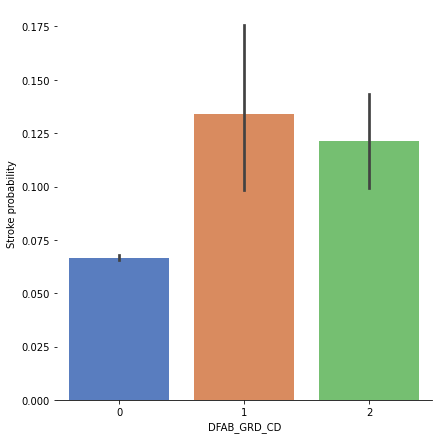

In [ ]:
#DFAB_GRD_CD -> 1 : (high stroke probability)
g = sns.factorplot(x='DFAB_GRD_CD', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


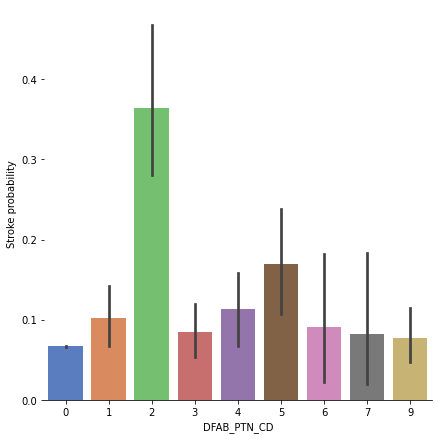

In [ ]:
#DFAB_PTN_CD (2: high)
g = sns.factorplot(x='DFAB_PTN_CD', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

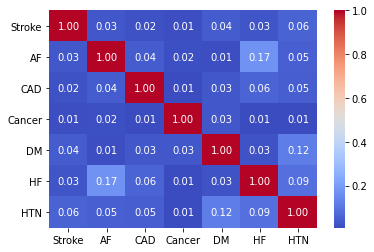

In [ ]:
#미래 및 과거 병력 정보와 Stroke
g = sns.heatmap(data[['Stroke', 'AF', 'CAD', 'Cancer', 'DM', 'HF', 'HTN']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


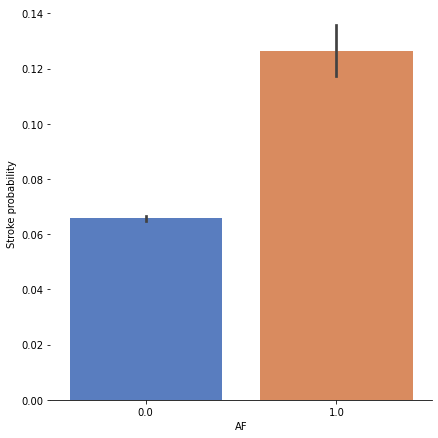

In [ ]:
#AF(심방세동) vs Stroke  (1: high)
g = sns.factorplot(x='AF', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


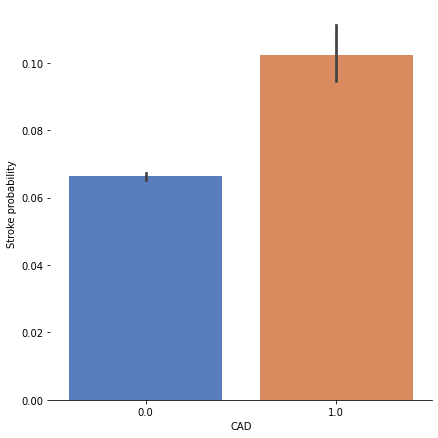

In [ ]:
#CAD(심근경색) vs Storke
g = sns.factorplot(x='CAD', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


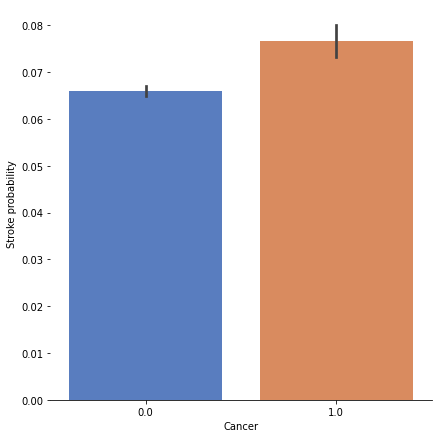

In [ ]:
#Cancer vs Storke
g = sns.factorplot(x='Cancer', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


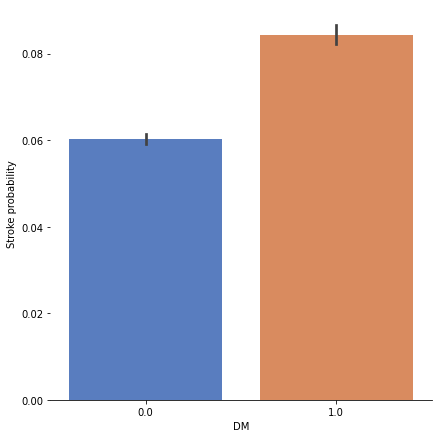

In [ ]:
#DM vs Stroke
g = sns.factorplot(x='DM', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


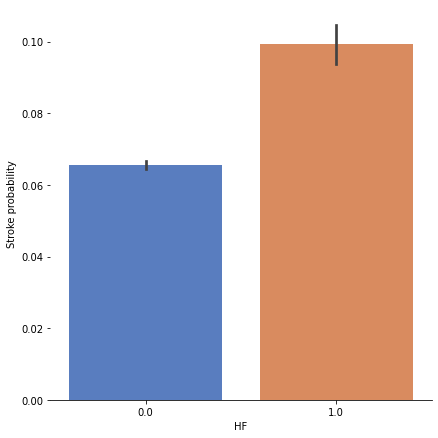

In [ ]:
#HF vs Stroke
g = sns.factorplot(x='HF', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


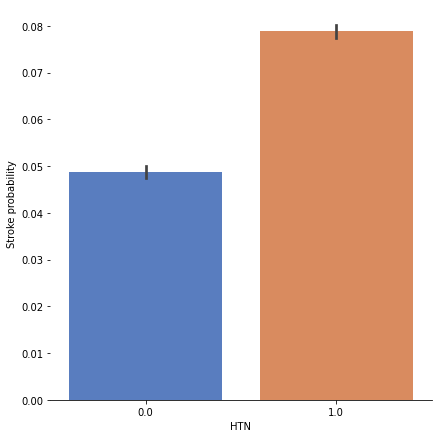

In [ ]:
#HTN vs stroke
g = sns.factorplot(x='HTN', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

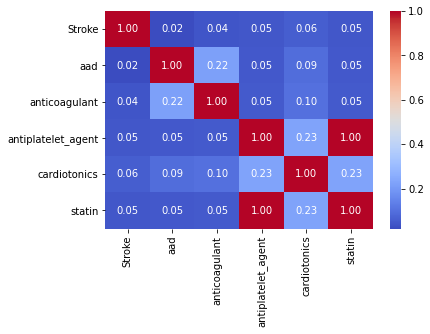

In [ ]:
#과거 약제 정보와 Stroke
g = sns.heatmap(data[['Stroke', 'aad', 'anticoagulant', 'antiplatelet_agent', 'cardiotonics', 'statin']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


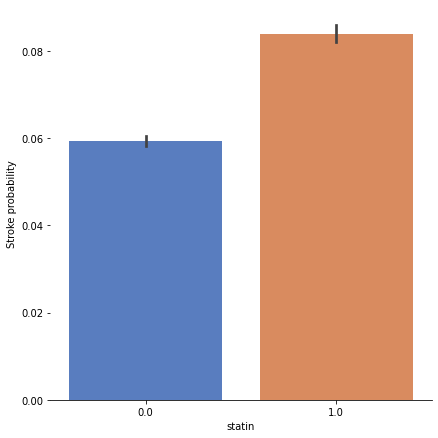

In [ ]:
#Stroke vs statin
g = sns.factorplot(x='statin', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


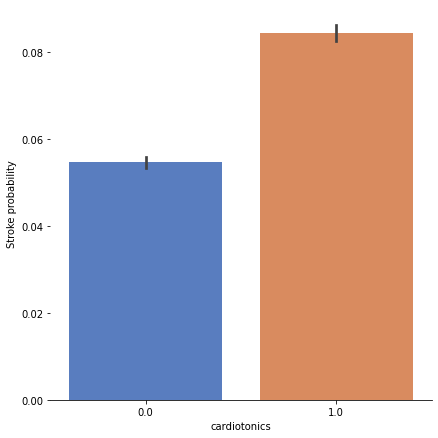

In [ ]:
#cardiotonics vs Stroke
g = sns.factorplot(x='cardiotonics', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


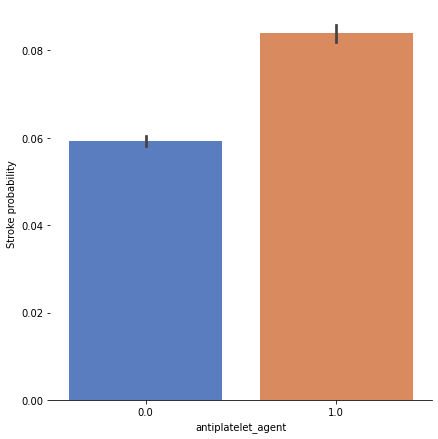

In [ ]:
#antiplatelet_agent vs Stroke
g = sns.factorplot(x='antiplatelet_agent', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


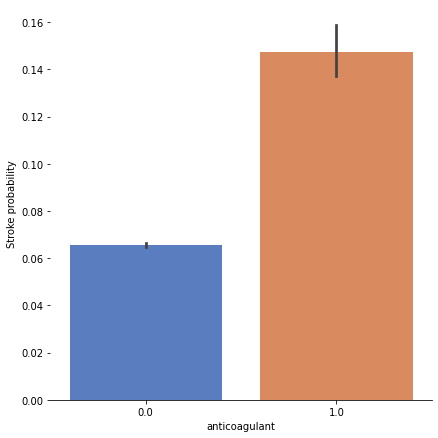

In [ ]:
#anticoagulant vs Stroke
g = sns.factorplot(x='anticoagulant', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


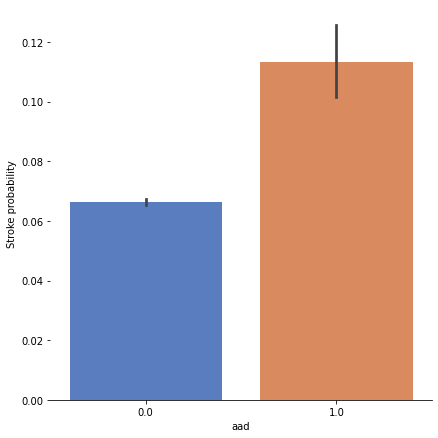

In [ ]:
#aad vs Stroke
g = sns.factorplot(x='aad', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


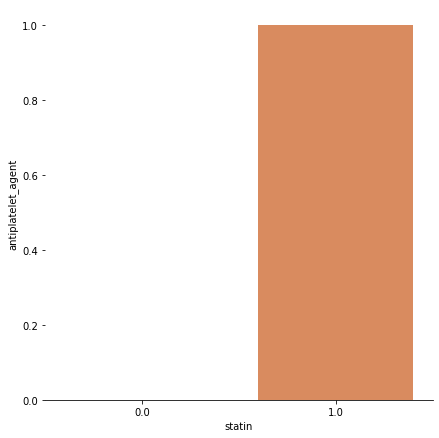

In [ ]:
#statin(콜레스테롤 합성저해제) vs antiplatelet_agent(항혈소판제)
g = sns.factorplot(x='statin', y='antiplatelet_agent', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('antiplatelet_agent')

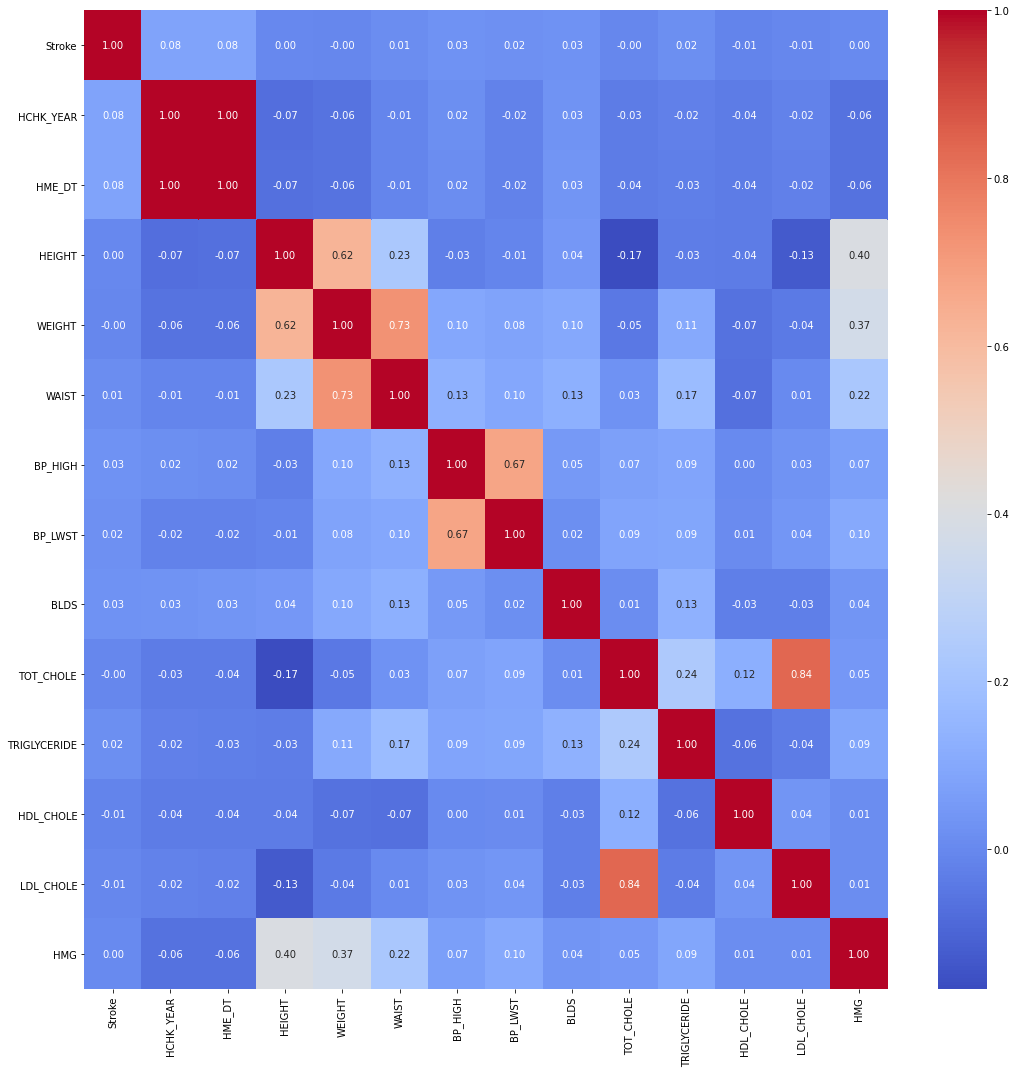

In [ ]:
#건강 검진 정보(검진연도 ~ 혈색소(22 ~ 34))와 Stroke
fig, ax = plt.subplots(figsize = (18, 18))
g = sns.heatmap(data[['Stroke', 'HCHK_YEAR', 'HME_DT', 'HEIGHT', 'WEIGHT', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


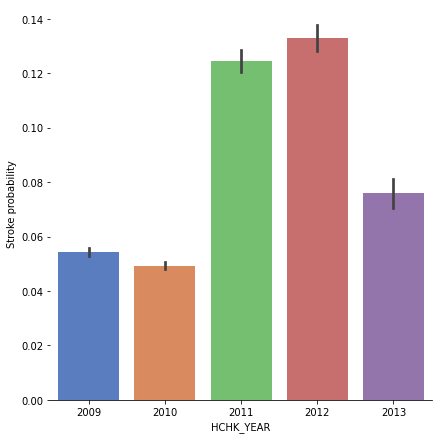

In [ ]:
#HCHK_YEAR vs Stroke
g = sns.factorplot(x='HCHK_YEAR', y='Stroke', data=data, kind='bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

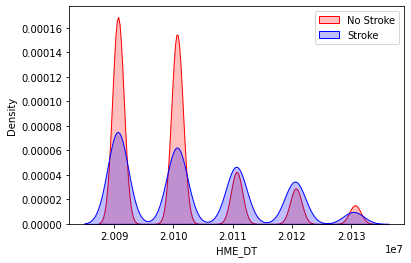

In [ ]:
#HME_DT vs Stroke
g = sns.kdeplot(data['HME_DT'][(data['Stroke'] == 0)], color='Red', shade=True)
g = sns.kdeplot(data['HME_DT'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = g)
g.set_xlabel("HME_DT")
g = g.legend(['No Stroke', 'Stroke'])

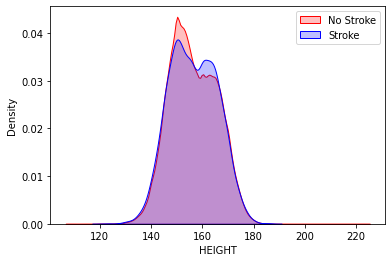

In [ ]:
#HEIGHT vs Stroke
g = sns.kdeplot(data['HEIGHT'][(data['Stroke'] == 0)], color='Red', shade=True)
g = sns.kdeplot(data['HEIGHT'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = g)
g.set_xlabel("HEIGHT")
g = g.legend(['No Stroke', 'Stroke'])

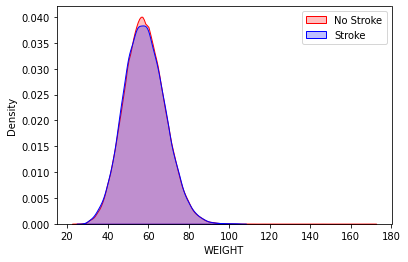

In [ ]:
#WEIGHT vs Stroke -> 영향 x 
g = sns.kdeplot(data['WEIGHT'][(data['Stroke'] == 0)], color='Red', shade=True)
g = sns.kdeplot(data['WEIGHT'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = g)
g.set_xlabel("WEIGHT")
g = g.legend(['No Stroke', 'Stroke'])

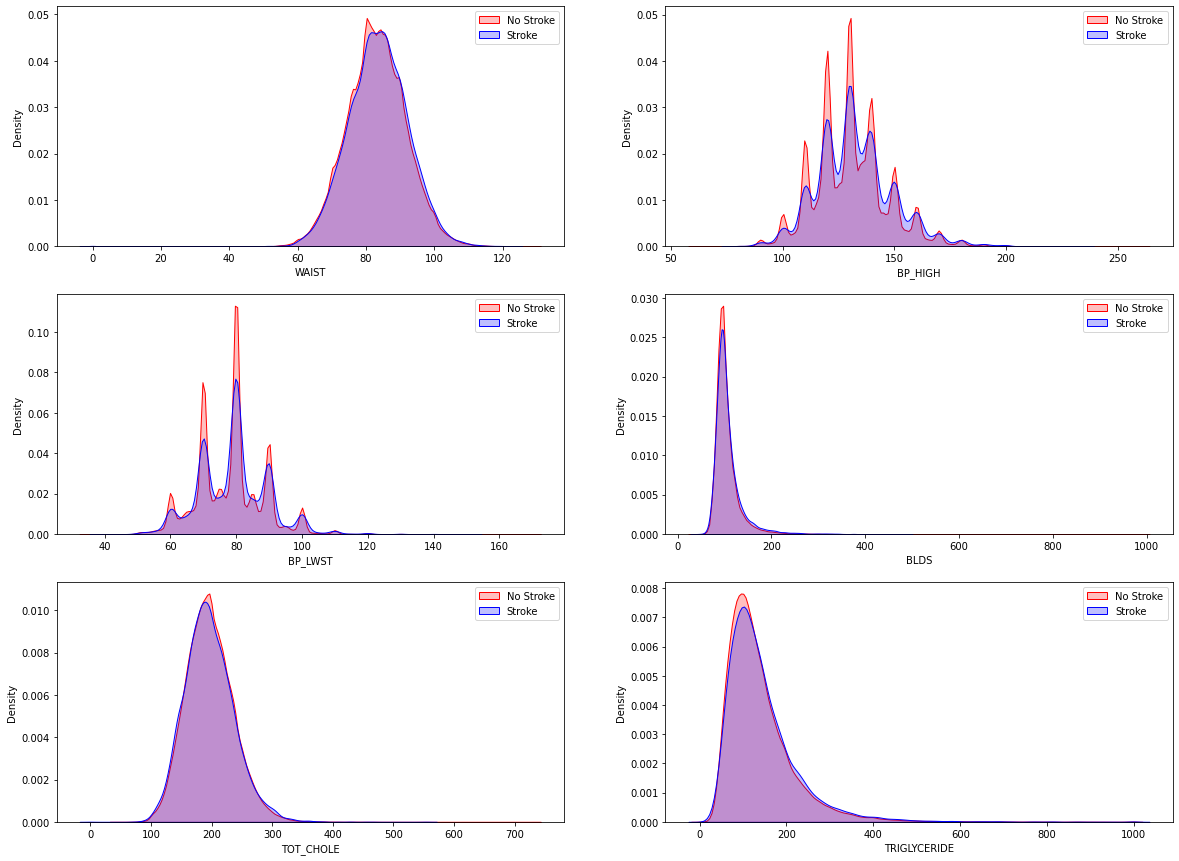

In [ ]:
#BP_HIGH, BP_LWST, BLDS, TOT_CHOLE, TRIGLYCERIDE
f , ax = plt.subplots(3, 2, figsize=(20,15))
sns.kdeplot(data['WAIST'][(data['Stroke'] == 0)], color='Red', shade=True, ax= ax[0,0])
sns.kdeplot(data['WAIST'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0, 0])
ax[0, 0].set_xlabel("WAIST")
ax[0, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['BP_HIGH'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[0, 1])
sns.kdeplot(data['BP_HIGH'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0, 1])
ax[0, 1].set_xlabel("BP_HIGH")
ax[0, 1].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['BP_LWST'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 0])
sns.kdeplot(data['BP_LWST'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 0])
ax[1, 0].set_xlabel("BP_LWST")
ax[1, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['BLDS'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 1])
sns.kdeplot(data['BLDS'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 1])
ax[1, 1].set_xlabel("BLDS")
ax[1, 1].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['TOT_CHOLE'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[2, 0])
sns.kdeplot(data['TOT_CHOLE'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[2, 0])
ax[2, 0].set_xlabel("TOT_CHOLE")
ax[2, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['TRIGLYCERIDE'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[2, 1])
sns.kdeplot(data['TRIGLYCERIDE'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[2, 1])
ax[2, 1].set_xlabel("TRIGLYCERIDE")
ax[2, 1].legend(['No Stroke', 'Stroke'])

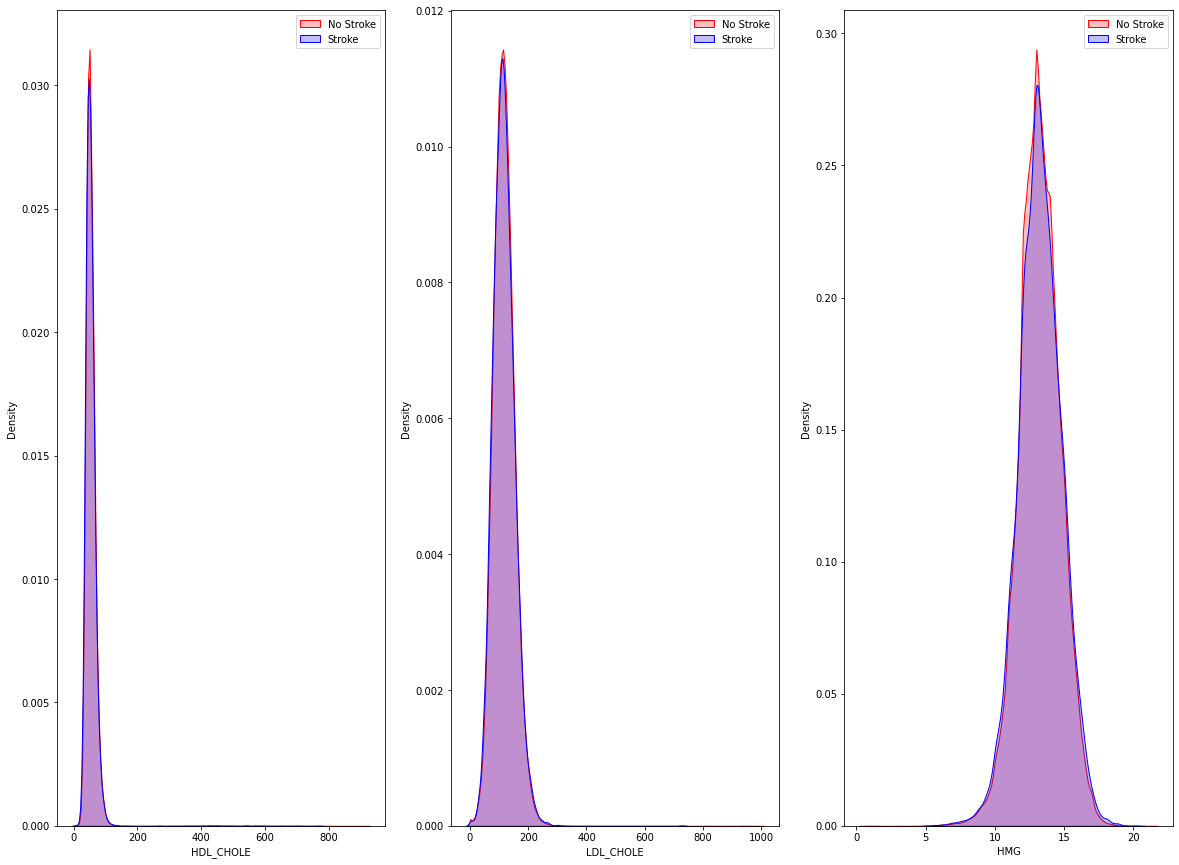

In [ ]:
#HDL_CHOLE, LDL_CHOLE, HMG -> Stroke에 큰 영향 없어 보임
f , ax = plt.subplots(1, 3, figsize=(20,15))
sns.kdeplot(data['HDL_CHOLE'][(data['Stroke'] == 0)], color='Red', shade=True, ax= ax[0])
sns.kdeplot(data['HDL_CHOLE'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0])
ax[0].set_xlabel("HDL_CHOLE")
ax[0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['LDL_CHOLE'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1])
sns.kdeplot(data['LDL_CHOLE'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1])
ax[1].set_xlabel("LDL_CHOLE")
ax[1].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['HMG'][(data['Stroke'] == 0)], color='Red', shade=True)
sns.kdeplot(data['HMG'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[2])
ax[2].set_xlabel("HMG")
ax[2].legend(['No Stroke', 'Stroke'])

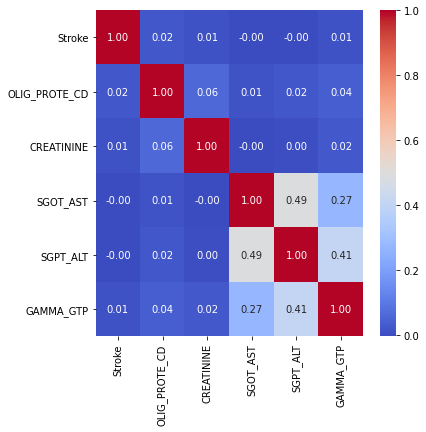

In [ ]:
#OLIG_PROTE_CD ~ GAMMA_GTP
fig, ax = plt.subplots(figsize = (6, 6))
g = sns.heatmap(data[['Stroke', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


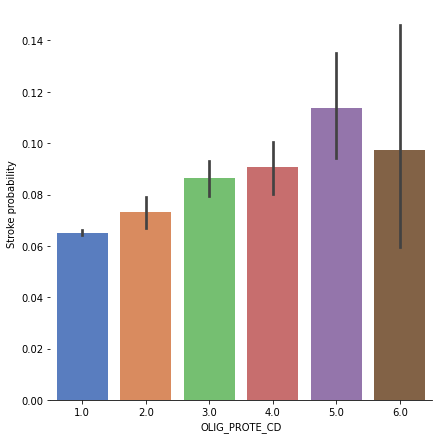

In [ ]:
#OLIG_PROTE_CD vs Stroke
g = sns.factorplot(x='OLIG_PROTE_CD', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

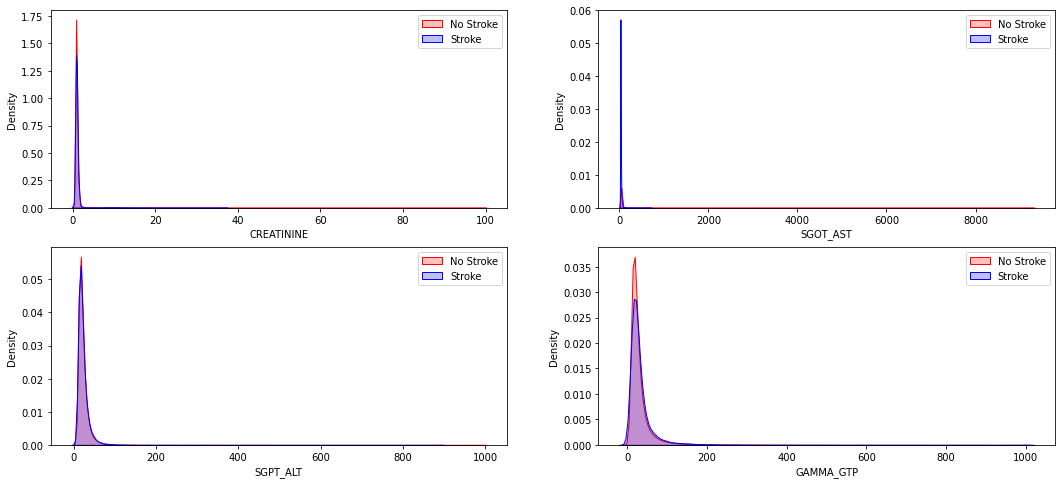

In [ ]:
#CREATIINNE, SGOT_AST, SGPT_ALT, GAMMA_GTP
f , ax = plt.subplots(2, 2, figsize=(18,8))
sns.kdeplot(data['CREATININE'][(data['Stroke'] == 0)], color='Red', shade=True, ax= ax[0,0])
sns.kdeplot(data['CREATININE'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0, 0])
ax[0, 0].set_xlabel("CREATININE")
ax[0, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['SGOT_AST'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[0, 1])
sns.kdeplot(data['SGOT_AST'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0, 1])
ax[0, 1].set_xlabel("SGOT_AST")
ax[0, 1].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['SGPT_ALT'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 0])
sns.kdeplot(data['SGPT_ALT'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 0])
ax[1, 0].set_xlabel("SGPT_ALT")
ax[1, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['GAMMA_GTP'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 1])
sns.kdeplot(data['GAMMA_GTP'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 1])
ax[1, 1].set_xlabel("GAMMA_GTP")
ax[1, 1].legend(['No Stroke', 'Stroke'])

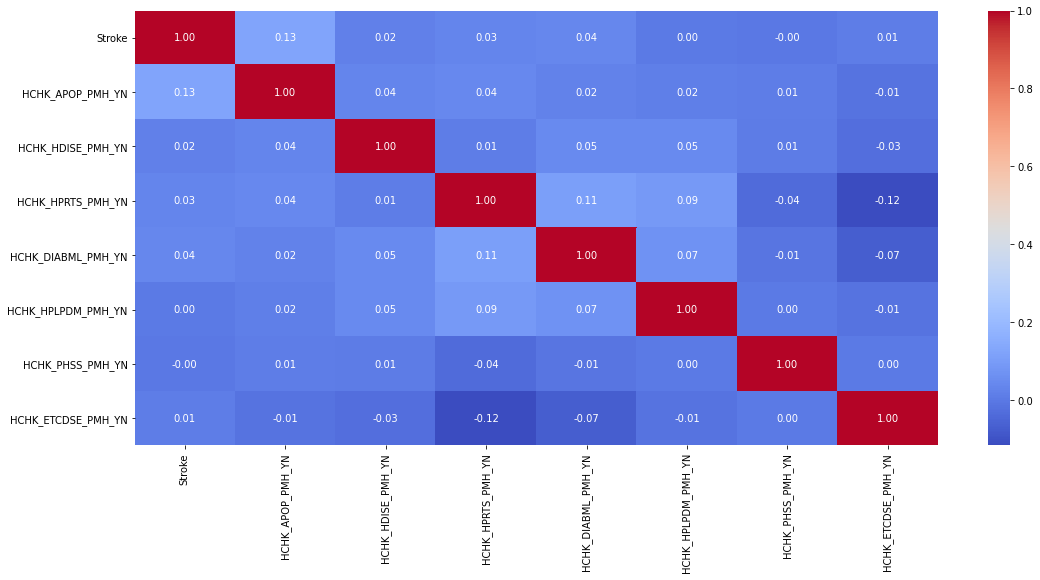

In [ ]:
#본인 병력 유무 vs Stroke
fig, ax = plt.subplots(figsize = (18, 8))
g = sns.heatmap(data[['Stroke', 'HCHK_APOP_PMH_YN', 'HCHK_HDISE_PMH_YN', 'HCHK_HPRTS_PMH_YN', 'HCHK_DIABML_PMH_YN', 'HCHK_HPLPDM_PMH_YN', 'HCHK_PHSS_PMH_YN', 'HCHK_ETCDSE_PMH_YN']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


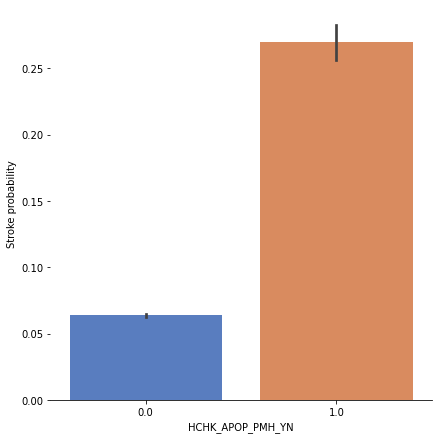

In [ ]:
# HCHK_APOP_PMH_YN 뇌졸중과거병력유무
g = sns.factorplot(x='HCHK_APOP_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


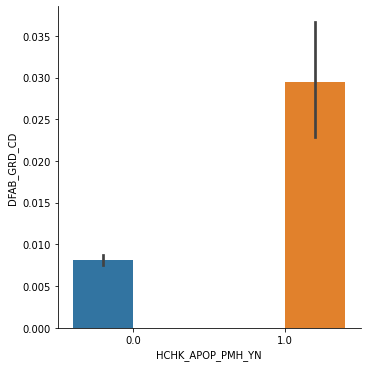

In [ ]:
sns.factorplot(y='DFAB_GRD_CD', x='HCHK_APOP_PMH_YN', data=data, hue='HCHK_APOP_PMH_YN', kind='bar')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


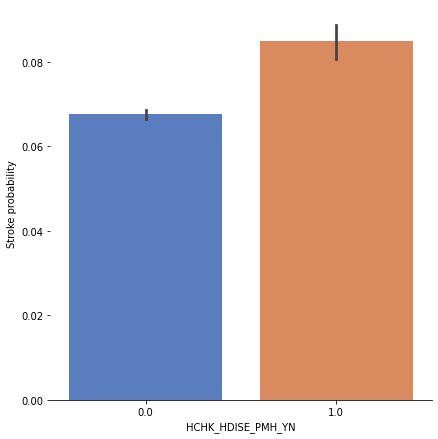

In [ ]:
#심장병
g = sns.factorplot(x='HCHK_HDISE_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


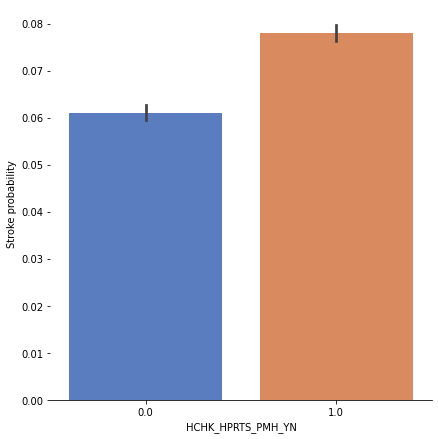

In [ ]:
#고혈압
g = sns.factorplot(x='HCHK_HPRTS_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


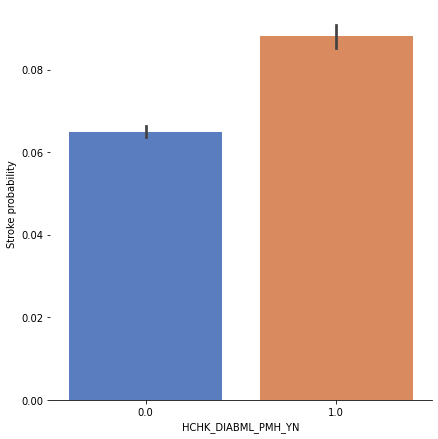

In [ ]:
#당뇨병
g = sns.factorplot(x='HCHK_DIABML_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


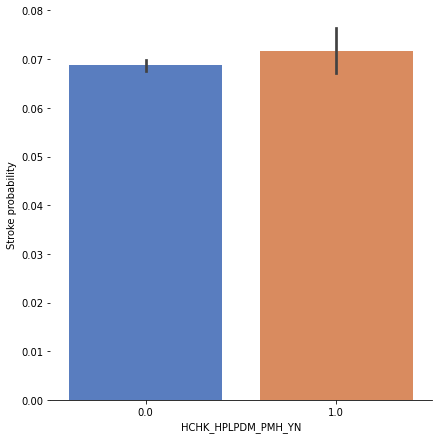

In [ ]:
#고지혈증
g = sns.factorplot(x='HCHK_HPLPDM_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


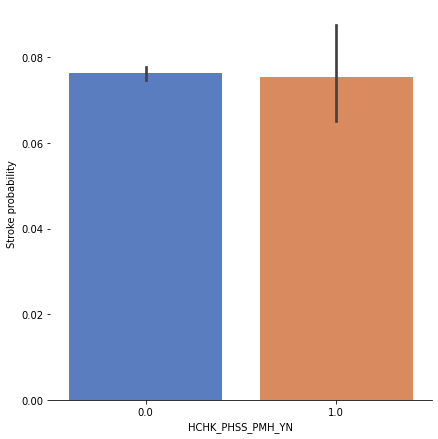

In [ ]:
#폐결핵
g = sns.factorplot(x='HCHK_PHSS_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


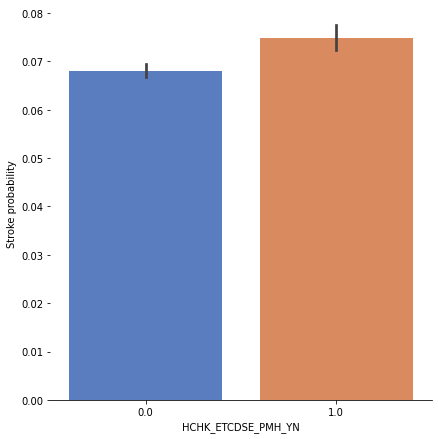

In [ ]:
#기타질환(암포함)
g = sns.factorplot(x='HCHK_ETCDSE_PMH_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

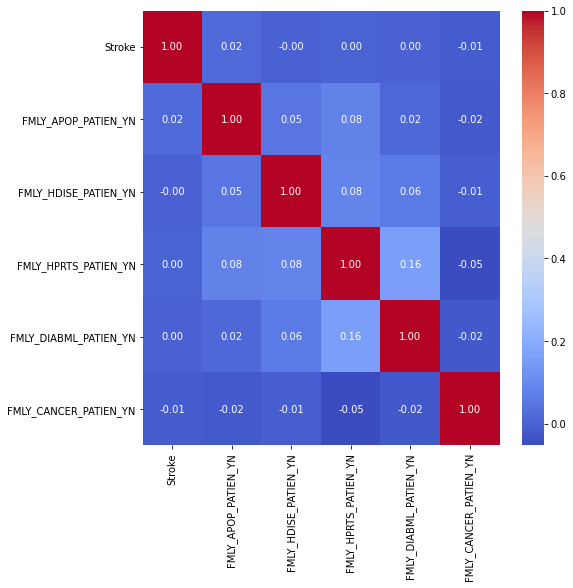

In [ ]:
#가족력 vs Stroke
fig, ax = plt.subplots(figsize = (8, 8))
g = sns.heatmap(data[['Stroke', 'FMLY_APOP_PATIEN_YN', 'FMLY_HDISE_PATIEN_YN', 'FMLY_HPRTS_PATIEN_YN', 'FMLY_DIABML_PATIEN_YN', 'FMLY_CANCER_PATIEN_YN']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


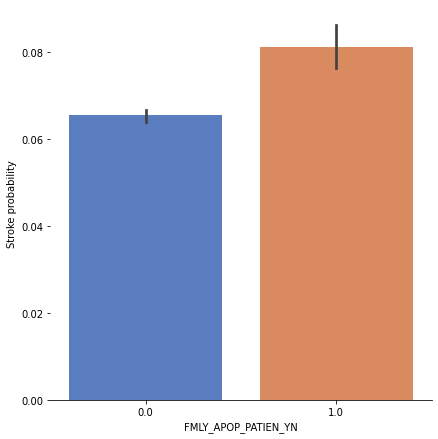

In [ ]:
#가족력 뇌졸중
g = sns.factorplot(x='FMLY_APOP_PATIEN_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


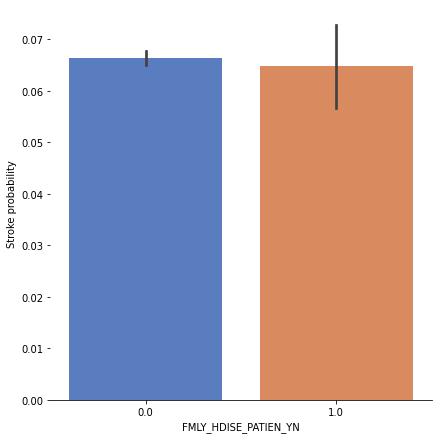

In [ ]:
#가족력 심장병
g = sns.factorplot(x='FMLY_HDISE_PATIEN_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


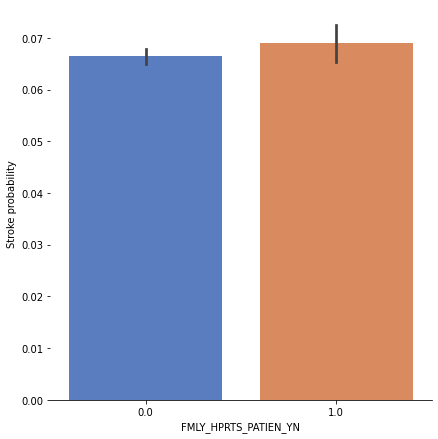

In [ ]:
#가족력 고혈압
g = sns.factorplot(x='FMLY_HPRTS_PATIEN_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


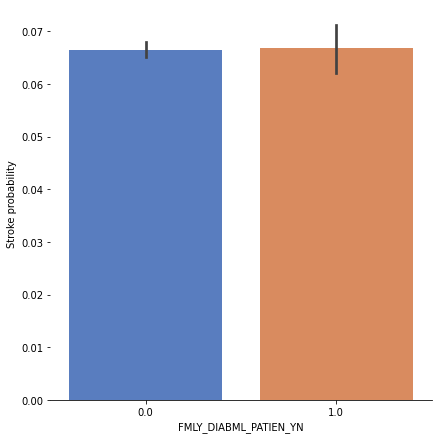

In [ ]:
#가족력 당뇨병
g = sns.factorplot(x='FMLY_DIABML_PATIEN_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


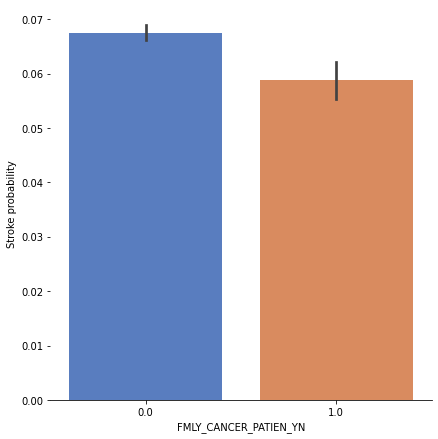

In [ ]:
#가족력 기타(암포함)환자유무
g = sns.factorplot(x='FMLY_CANCER_PATIEN_YN', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

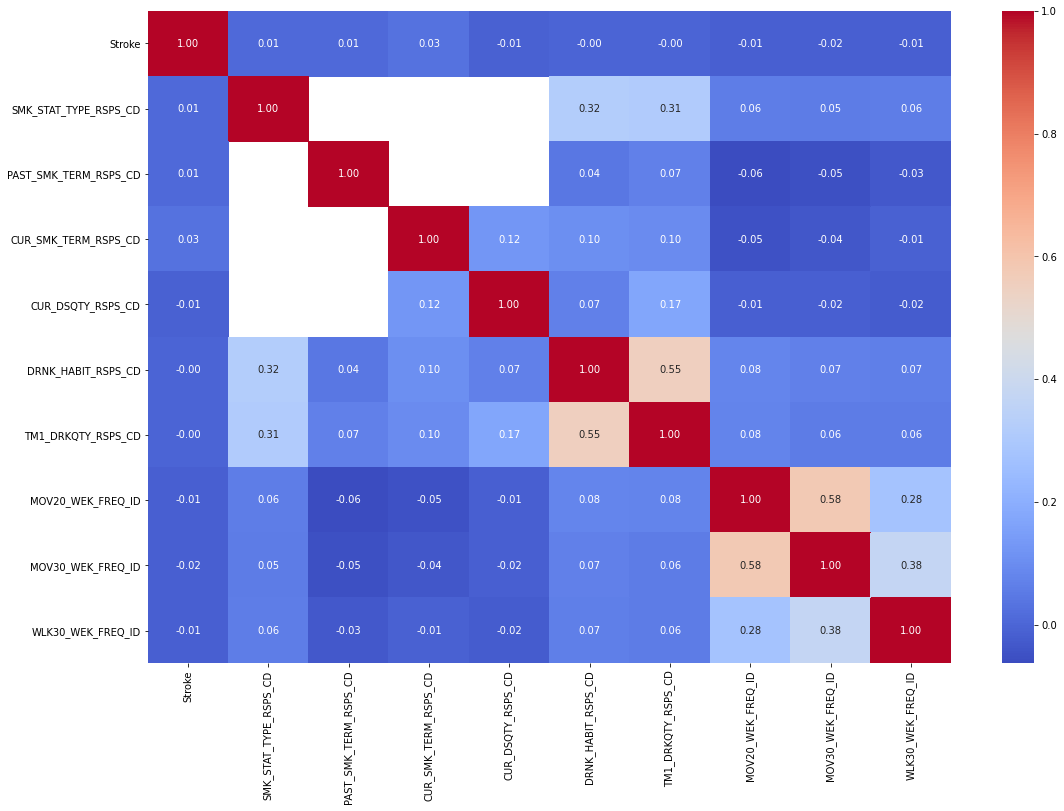

In [ ]:
#흡연, 음주, 생활습관 vs Stroke
fig, ax = plt.subplots(figsize = (18, 12))
g = sns.heatmap(data[['Stroke', 'SMK_STAT_TYPE_RSPS_CD', 'PAST_SMK_TERM_RSPS_CD', 'CUR_SMK_TERM_RSPS_CD', 'CUR_DSQTY_RSPS_CD', 'DRNK_HABIT_RSPS_CD', 'TM1_DRKQTY_RSPS_CD', 'MOV20_WEK_FREQ_ID', 'MOV30_WEK_FREQ_ID', 'WLK30_WEK_FREQ_ID']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

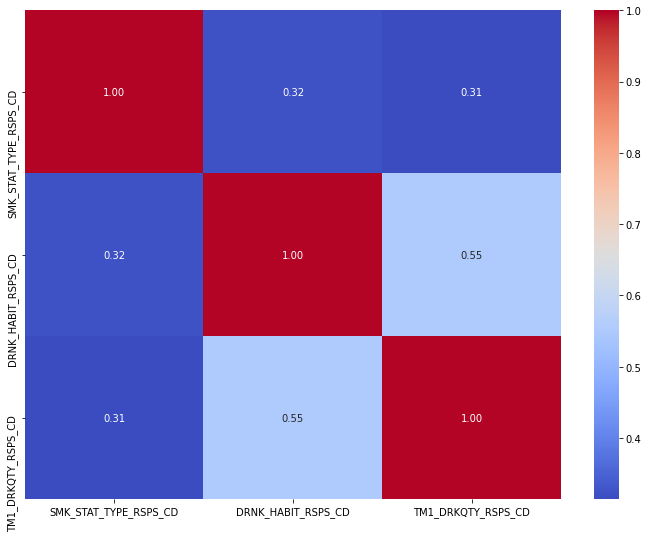

In [ ]:
#흡연, 음주, 생활습관 vs Stroke
fig, ax = plt.subplots(figsize = (12, 9))
g = sns.heatmap(data[['SMK_STAT_TYPE_RSPS_CD', 'DRNK_HABIT_RSPS_CD', 'TM1_DRKQTY_RSPS_CD']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


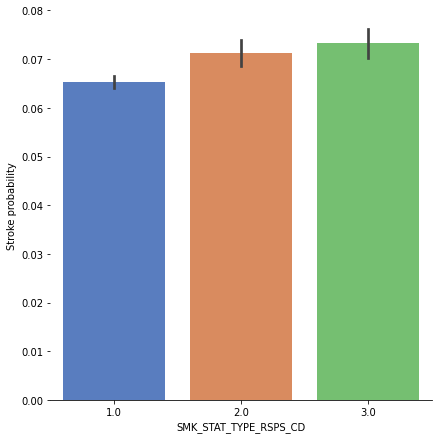

In [ ]:
#흡연상태
g = sns.factorplot(x='SMK_STAT_TYPE_RSPS_CD', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

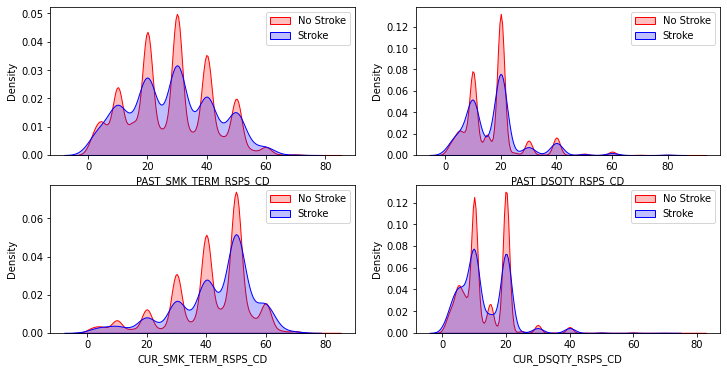

In [ ]:
#흡연기간, 하루흡연량 과거, 현재
f , ax = plt.subplots(2, 2, figsize=(12,6))
sns.kdeplot(data['PAST_SMK_TERM_RSPS_CD'][(data['Stroke'] == 0)], color='Red', shade=True, ax=ax[0, 0])
sns.kdeplot(data['PAST_SMK_TERM_RSPS_CD'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0,0])
ax[0, 0].set_xlabel("PAST_SMK_TERM_RSPS_CD")
ax[0, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['PAST_DSQTY_RSPS_CD'][(data['Stroke'] == 0)], color='Red', shade=True, ax= ax[0, 1])
sns.kdeplot(data['PAST_DSQTY_RSPS_CD'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0, 1])
ax[0, 1].set_xlabel("PAST_DSQTY_RSPS_CD")
ax[0, 1].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['CUR_SMK_TERM_RSPS_CD'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 0])
sns.kdeplot(data['CUR_SMK_TERM_RSPS_CD'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 0])
ax[1, 0].set_xlabel("CUR_SMK_TERM_RSPS_CD")
ax[1, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['CUR_DSQTY_RSPS_CD'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 1])
sns.kdeplot(data['CUR_DSQTY_RSPS_CD'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 1])
ax[1, 1].set_xlabel("CUR_DSQTY_RSPS_CD")
ax[1, 1].legend(['No Stroke', 'Stroke'])

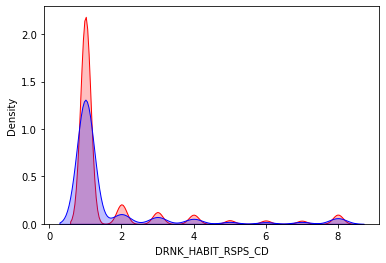

In [ ]:
#음주습관
g = sns.kdeplot(data['DRNK_HABIT_RSPS_CD'][(data['Stroke'] == 0)], color='Red', shade=True)
sns.kdeplot(data['DRNK_HABIT_RSPS_CD'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = g)

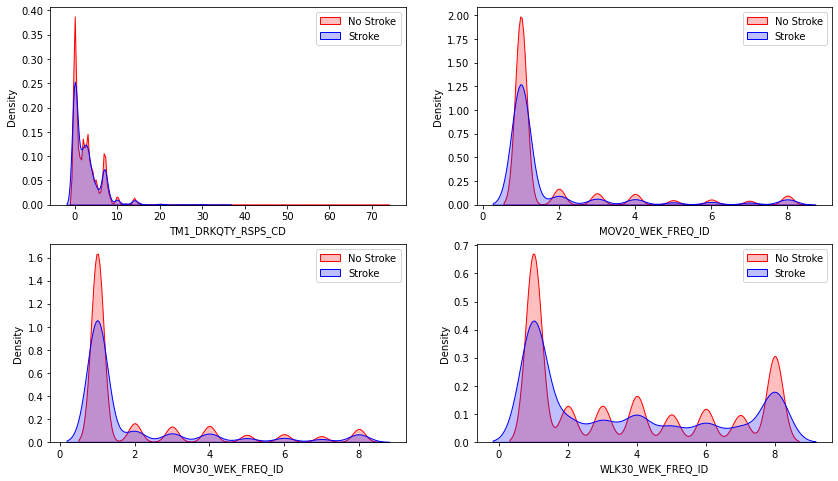

In [ ]:
#1회음주량, 흡연기간, 하루흡연량 과거, 현재
f , ax = plt.subplots(2, 2, figsize=(14,8))
sns.kdeplot(data['TM1_DRKQTY_RSPS_CD'][(data['Stroke'] == 0)], color='Red', shade=True, ax=ax[0, 0])
sns.kdeplot(data['TM1_DRKQTY_RSPS_CD'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0,0])
ax[0, 0].set_xlabel("TM1_DRKQTY_RSPS_CD")
ax[0, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['MOV20_WEK_FREQ_ID'][(data['Stroke'] == 0)], color='Red', shade=True, ax= ax[0, 1])
sns.kdeplot(data['MOV20_WEK_FREQ_ID'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[0, 1])
ax[0, 1].set_xlabel("MOV20_WEK_FREQ_ID")
ax[0, 1].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['MOV30_WEK_FREQ_ID'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 0])
sns.kdeplot(data['MOV30_WEK_FREQ_ID'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 0])
ax[1, 0].set_xlabel("MOV30_WEK_FREQ_ID")
ax[1, 0].legend(['No Stroke', 'Stroke'])

sns.kdeplot(data['WLK30_WEK_FREQ_ID'][(data['Stroke'] == 0)], color='Red', shade=True, ax = ax[1, 1])
sns.kdeplot(data['WLK30_WEK_FREQ_ID'][(data['Stroke'] == 1)], color='Blue', shade=True, ax = ax[1, 1])
ax[1, 1].set_xlabel("WLK30_WEK_FREQ_ID")
ax[1, 1].legend(['No Stroke', 'Stroke'])

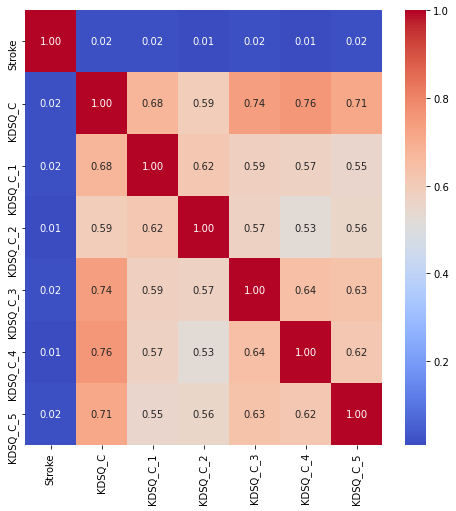

In [ ]:
#가족력 vs Stroke
fig, ax = plt.subplots(figsize = (8, 8))
g = sns.heatmap(data[['Stroke', 'KDSQ_C', 'KDSQ_C_1', 'KDSQ_C_2', 'KDSQ_C_3', 'KDSQ_C_4', 'KDSQ_C_5']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


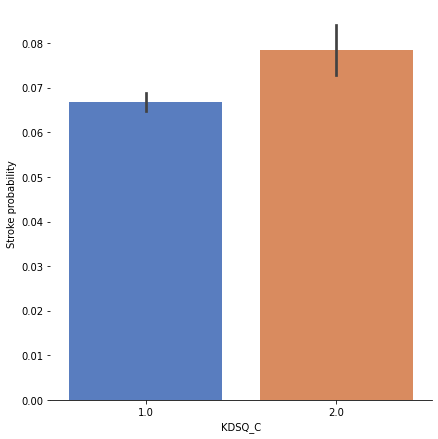

In [ ]:
#KDSQ_C
g = sns.factorplot(x='KDSQ_C', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


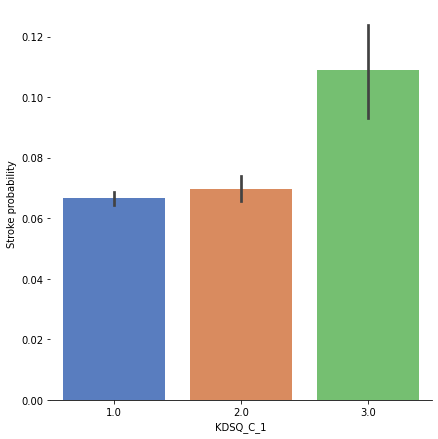

In [ ]:
#KDSQ_C_1
g = sns.factorplot(x='KDSQ_C_1', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


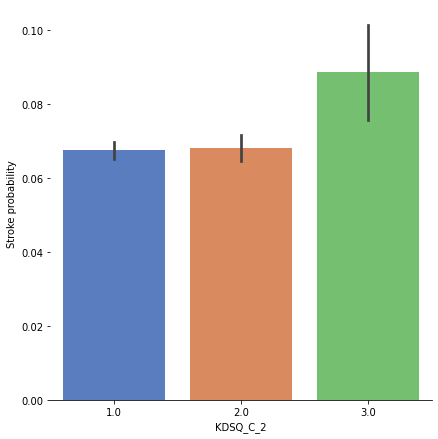

In [ ]:
#KDSQ_C_2
g = sns.factorplot(x='KDSQ_C_2', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


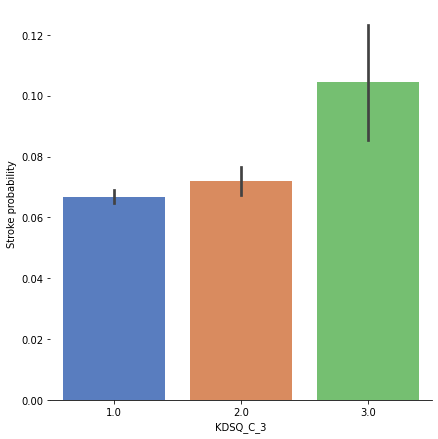

In [ ]:
#KDSQ_C_3
g = sns.factorplot(x='KDSQ_C_3', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


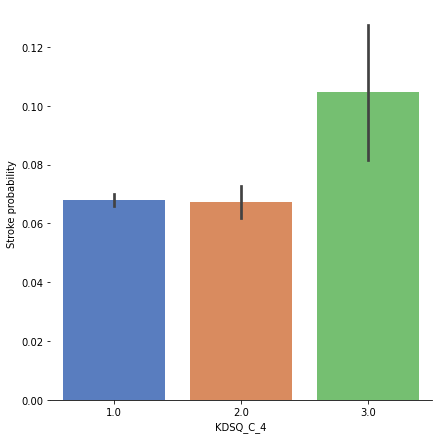

In [ ]:
#KDSQ_C_4
g = sns.factorplot(x='KDSQ_C_4', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


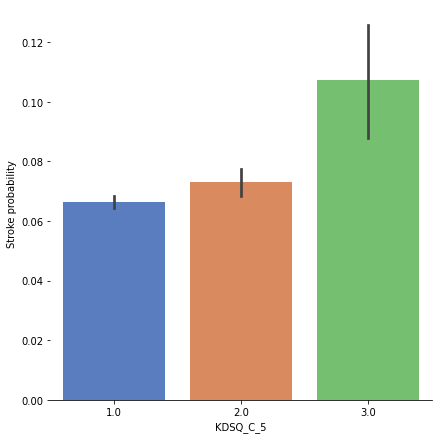

In [ ]:
#KDSQ_C_5
g = sns.factorplot(x='KDSQ_C_5', y='Stroke', data=data, kind = 'bar', size=6, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Stroke probability')

In [ ]:
#fill Null with DRNK_HABIT's mean value
data['DRNK_HABIT_RSPS_CD'].mean()

1.7018457365012223

In [ ]:
data['DRNK_HABIT_RSPS_CD'] = data['DRNK_HABIT_RSPS_CD'].fillna(2)

In [ ]:
data['DRNK_HABIT_RSPS_CD'].isnull().sum()

0

In [ ]:
data['TM1_DRKQTY_RSPS_CD'].isnull().sum()

159124

In [ ]:
data.groupby('DRNK_HABIT_RSPS_CD')['TM1_DRKQTY_RSPS_CD'].mean()

DRNK_HABIT_RSPS_CD
1.0    0.112471
2.0    3.219475
3.0    4.261009
4.0    4.760239
5.0    5.174149
6.0    5.404600
7.0    5.689445
8.0    5.793124
Name: TM1_DRKQTY_RSPS_CD, dtype: float64

In [ ]:
#fill Null TM1_DRNKQTY_RSPS_CD
data.loc[((data.DRNK_HABIT_RSPS_CD == 1) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 0
data.loc[((data.DRNK_HABIT_RSPS_CD == 2) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 3
data.loc[((data.DRNK_HABIT_RSPS_CD == 3) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 4
data.loc[((data.DRNK_HABIT_RSPS_CD == 4) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 5
data.loc[((data.DRNK_HABIT_RSPS_CD == 5) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 5
data.loc[((data.DRNK_HABIT_RSPS_CD == 6) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 5
data.loc[((data.DRNK_HABIT_RSPS_CD == 7) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 6
data.loc[((data.DRNK_HABIT_RSPS_CD == 8) & data.TM1_DRKQTY_RSPS_CD.isnull()), 'TM1_DRKQTY_RSPS_CD'] = 6


In [ ]:
data['TM1_DRKQTY_RSPS_CD'].isnull().sum()

0

In [ ]:
#fill Null with MOV20_WEK_RSPS_CD's mean value
data['MOV20_WEK_FREQ_ID'].mean()

1.8088992743010417

In [ ]:
data['MOV20_WEK_FREQ_ID'] = data['MOV20_WEK_FREQ_ID'].fillna(2)

In [ ]:
data['MOV20_WEK_FREQ_ID'].isnull().sum()

0

In [ ]:
#fill LDL_CHOLE with mean value

In [ ]:
data['LDL_CHOLE'].mean()

116.24721424657986

In [ ]:
data['LDL_CHOLE'].isnull().sum()

1418

In [ ]:
data['LDL_CHOLE'] = data['LDL_CHOLE'].fillna(116.2)

In [ ]:
data['LDL_CHOLE'].isnull().sum()

0

In [ ]:
#fill WLK30_WEK_FREQ_ID
data.groupby('MOV20_WEK_FREQ_ID')['WLK30_WEK_FREQ_ID'].mean()

MOV20_WEK_FREQ_ID
1.0    3.335247
2.0    3.759164
3.0    4.027717
4.0    4.438119
5.0    4.835310
6.0    5.297695
7.0    5.920916
8.0    6.532758
Name: WLK30_WEK_FREQ_ID, dtype: float64

In [ ]:
data.loc[((data.MOV20_WEK_FREQ_ID == 1) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 3
data.loc[((data.MOV20_WEK_FREQ_ID == 2) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 4
data.loc[((data.MOV20_WEK_FREQ_ID == 3) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 4
data.loc[((data.MOV20_WEK_FREQ_ID == 4) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 4
data.loc[((data.MOV20_WEK_FREQ_ID == 5) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 5
data.loc[((data.MOV20_WEK_FREQ_ID == 6) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 5
data.loc[((data.MOV20_WEK_FREQ_ID == 7) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 6
data.loc[((data.MOV20_WEK_FREQ_ID == 8) & data.WLK30_WEK_FREQ_ID.isnull()), 'WLK30_WEK_FREQ_ID'] = 7


In [ ]:
data['WLK30_WEK_FREQ_ID'].isnull().sum()

0

In [ ]:
#fill MOV30_WEK_FREQ_ID

In [ ]:
data['MOV30_WEK_FREQ_ID'].isnull().sum()

1770

In [ ]:
data.groupby('MOV20_WEK_FREQ_ID')['MOV30_WEK_FREQ_ID'].mean()

MOV20_WEK_FREQ_ID
1.0    1.509337
2.0    2.403498
3.0    2.945794
4.0    3.533827
5.0    4.101277
6.0    4.639110
7.0    5.474876
8.0    5.973102
Name: MOV30_WEK_FREQ_ID, dtype: float64

In [ ]:
data.loc[((data.MOV20_WEK_FREQ_ID == 1) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 2
data.loc[((data.MOV20_WEK_FREQ_ID == 2) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 2
data.loc[((data.MOV20_WEK_FREQ_ID == 3) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 3
data.loc[((data.MOV20_WEK_FREQ_ID == 4) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 4
data.loc[((data.MOV20_WEK_FREQ_ID == 5) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 4
data.loc[((data.MOV20_WEK_FREQ_ID == 6) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 5
data.loc[((data.MOV20_WEK_FREQ_ID == 7) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 5
data.loc[((data.MOV20_WEK_FREQ_ID == 8) & data.MOV30_WEK_FREQ_ID.isnull()), 'MOV30_WEK_FREQ_ID'] = 6


In [ ]:
data['MOV30_WEK_FREQ_ID'].isnull().sum()

0

In [ ]:
#fill SMK_STAT_TYPE_RSPS_CD

In [ ]:
data.groupby('DRNK_HABIT_RSPS_CD')['SMK_STAT_TYPE_RSPS_CD'].mean()

DRNK_HABIT_RSPS_CD
1.0    1.244429
2.0    1.600186
3.0    1.784650
4.0    1.856518
5.0    1.910747
6.0    1.936643
7.0    1.982247
8.0    1.975771
Name: SMK_STAT_TYPE_RSPS_CD, dtype: float64

In [ ]:
data.loc[((data.DRNK_HABIT_RSPS_CD == 1) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 1
data.loc[((data.DRNK_HABIT_RSPS_CD == 2) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2
data.loc[((data.DRNK_HABIT_RSPS_CD == 3) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2
data.loc[((data.DRNK_HABIT_RSPS_CD == 4) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2
data.loc[((data.DRNK_HABIT_RSPS_CD == 5) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2
data.loc[((data.DRNK_HABIT_RSPS_CD == 6) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2
data.loc[((data.DRNK_HABIT_RSPS_CD == 7) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2
data.loc[((data.DRNK_HABIT_RSPS_CD == 8) & data.SMK_STAT_TYPE_RSPS_CD.isnull()), 'SMK_STAT_TYPE_RSPS_CD'] = 2


In [ ]:
data['SMK_STAT_TYPE_RSPS_CD'].isnull().sum()

0

In [ ]:
#fill OLIG_PROTE_CD

In [ ]:
data['OLIG_PROTE_CD'].isnull().sum()

3693

In [ ]:
data['OLIG_PROTE_CD'].mean()

1.1352265072064804

In [ ]:
data['OLIG_PROTE_CD'].fillna(1.0, inplace=True)

In [ ]:
data['OLIG_PROTE_CD'].isnull().sum()

0

In [ ]:
#fill GAMMA_GTP, BLDS

In [ ]:
data['GAMMA_GTP'].mean()

33.143320753789226

In [ ]:
data['GAMMA_GTP'].fillna(33, inplace=True)

In [ ]:
data['BLDS'].mean()

104.07679289969924

In [ ]:
data['BLDS'].fillna(104, inplace=True)

In [ ]:
data['BLDS'].isnull().sum()

0

In [ ]:
#fill SGOT_AST, SGPT_ALT, CREATININE -> mean
data['SGOT_AST'].mean()

26.57204907352013

In [ ]:
data['SGOT_AST'].fillna(26.8, inplace=True)

In [ ]:
data['SGPT_ALT'].mean()

22.017677574803923

In [ ]:
data['SGPT_ALT'].fillna(22.0, inplace=True)

In [ ]:
data['CREATININE'].mean()

1.002546713653357

In [ ]:
data['CREATININE'].fillna(1.0, inplace=True)

In [ ]:
#TOT_CHOLE, HDL_CHOLE, HMG, TRIGLYCERIDE -> mean
data['TOT_CHOLE'].mean()

196.4826426027695

In [ ]:
data['TOT_CHOLE'].fillna(196.5, inplace=True)

In [ ]:
data['HDL_CHOLE'].mean()

53.91679472206856

In [ ]:
data['HDL_CHOLE'].fillna(53.9, inplace=True)

In [ ]:
data['HMG'].mean()

13.219798368919342

In [ ]:
data['HMG'].fillna(13.2, inplace=True)

In [ ]:
data['TRIGLYCERIDE'].mean()

139.18997888349017

In [ ]:
data['TRIGLYCERIDE'].fillna(139.1, inplace=True)

In [ ]:
#BP_HIGH, BP_LWST fillna -> mean

In [ ]:
print('BP_HIGH mean : {}, BP_LWST.mean : {}'.format(data['BP_HIGH'].mean(), data['BP_LWST'].mean()))

BP_HIGH mean : 130.58696436330249, BP_LWST.mean : 78.05787376722604


In [ ]:
data['BP_HIGH'].fillna(130.6, inplace=True)
data['BP_LWST'].fillna(78.1, inplace=True)

In [ ]:
print("BP_HIGH null : {}, BP_LWST null: {}".format(data['BP_HIGH'].isnull().sum(), data['BP_LWST'].isnull().sum()))

BP_HIGH null : 0, BP_LWST null: 0


In [ ]:
#WEIGHT, HEIGHT, WAIST

In [ ]:
data[(data['HEIGHT'].isnull())]['WEIGHT'].isnull()

17         True
18         True
19         True
21         True
138        True
          ...  
215312     True
219967    False
242166    False
242567     True
243912     True
Name: WEIGHT, Length: 376, dtype: bool

In [ ]:
data['HEIGHT'].describe()

count    243795.000000
mean        156.270736
std           9.141221
min         109.000000
25%         149.000000
50%         156.000000
75%         163.000000
max         223.000000
Name: HEIGHT, dtype: float64

In [ ]:
data['HEIGHT'].fillna(156.3, inplace=True)

In [ ]:
data['HEIGHT'].isnull().sum()

0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

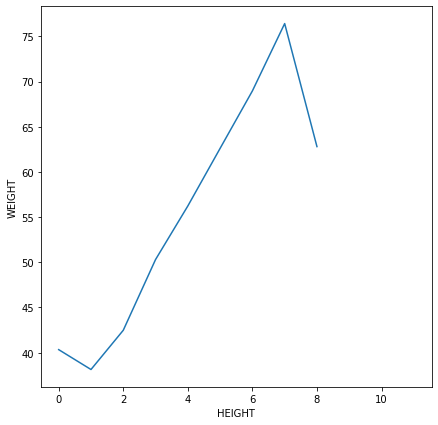

In [ ]:
temp = []
for i in range(109, 223, 10):
    temp.append(data[((i <= data['HEIGHT']) & (data['HEIGHT'] < (i+10)))]['WEIGHT'].sum() / len(data[((i <= data['HEIGHT']) & (data['HEIGHT'] < (i+10)))]['WEIGHT']))
    plt.figure(figsize=(7, 7))
plt.xlabel('HEIGHT')
plt.ylabel('WEIGHT')
plt.plot(temp)

In [ ]:
print(temp)

[40.333333333333336, 38.13559322033898, 42.47678275290215, 50.30233081169495, 56.23014477211796, 62.60617116932453, 68.96093172294799, 76.41263440860214, 62.8, nan, nan, 63.0]


In [ ]:
#209 ~220 -> 62.8로 채움
data.loc[(((109 <= data.HEIGHT) & (data.HEIGHT < 119)) & data.WEIGHT.isnull()), 'WEIGHT'] = 40.3
data.loc[(((119 <= data.HEIGHT) & (data.HEIGHT < 129)) & data.WEIGHT.isnull()), 'WEIGHT'] = 38.8
data.loc[(((129 <= data.HEIGHT) & (data.HEIGHT < 139)) & data.WEIGHT.isnull()), 'WEIGHT'] = 42.5
data.loc[(((139 <= data.HEIGHT) & (data.HEIGHT < 149)) & data.WEIGHT.isnull()), 'WEIGHT'] = 50.3
data.loc[(((149 <= data.HEIGHT) & (data.HEIGHT < 159)) & data.WEIGHT.isnull()), 'WEIGHT'] = 56.2
data.loc[(((159 <= data.HEIGHT) & (data.HEIGHT < 169)) & data.WEIGHT.isnull()), 'WEIGHT'] = 62.6
data.loc[(((169 <= data.HEIGHT) & (data.HEIGHT < 179)) & data.WEIGHT.isnull()), 'WEIGHT'] = 69.0
data.loc[(((179 <= data.HEIGHT) & (data.HEIGHT < 189)) & data.WEIGHT.isnull()), 'WEIGHT'] = 76.4
data.loc[(((189 <= data.HEIGHT) & (data.HEIGHT < 199)) & data.WEIGHT.isnull()), 'WEIGHT'] = 62.8
data.loc[(((199 <= data.HEIGHT) & (data.HEIGHT < 209)) & data.WEIGHT.isnull()), 'WEIGHT'] = 62.8
data.loc[(((209 <= data.HEIGHT) & (data.HEIGHT < 219)) & data.WEIGHT.isnull()), 'WEIGHT'] = 62.8
data.loc[(((219 <= data.HEIGHT) & (data.HEIGHT < 223)) & data.WEIGHT.isnull()), 'WEIGHT'] = 63.0


In [ ]:
data['WEIGHT'].isnull().sum()

0

In [ ]:
data['WAIST'].isnull().sum()

408

In [ ]:
data['WEIGHT'].describe()

count    244171.000000
mean         58.157203
std          10.041416
min          25.000000
25%          51.000000
50%          58.000000
75%          65.000000
max         170.000000
Name: WEIGHT, dtype: float64

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

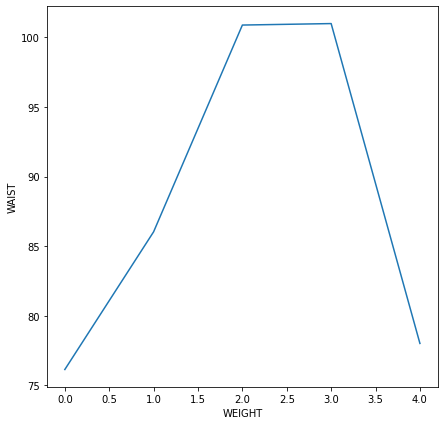

In [ ]:
temp_waist = []
for i in range(25, 170, 29):
    temp_waist.append(data[((i <= data['WEIGHT']) & (data['WEIGHT'] < (i+29)))]['WAIST'].sum() / len(data[((i <= data['WEIGHT']) & (data['WEIGHT'] < (i+29)))]['WAIST']))
    plt.figure(figsize=(7, 7))
plt.xlabel('WEIGHT')
plt.ylabel('WAIST')
plt.plot(temp_waist)

In [ ]:
print(temp_waist)

[76.12595131730376, 86.02630759845118, 100.89388356669123, 101.0, 78.0]


In [ ]:
data.loc[(((25 <= data.WEIGHT) & (data.WEIGHT < 54)) & data.WAIST.isnull()), 'WAIST'] = 76.1
data.loc[(((54 <= data.WEIGHT) & (data.WEIGHT < 83)) & data.WAIST.isnull()), 'WAIST'] = 86.0
data.loc[(((83 <= data.WEIGHT) & (data.WEIGHT < 112)) & data.WAIST.isnull()), 'WAIST'] = 100.9
data.loc[(((112 <= data.WEIGHT) & (data.WEIGHT < 141)) & data.WAIST.isnull()), 'WAIST'] = 101.0
data.loc[(((141 <= data.WEIGHT) & (data.WEIGHT < 170)) & data.WAIST.isnull()), 'WAIST'] = 78.0


In [ ]:
data['WEIGHT'].isnull().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update

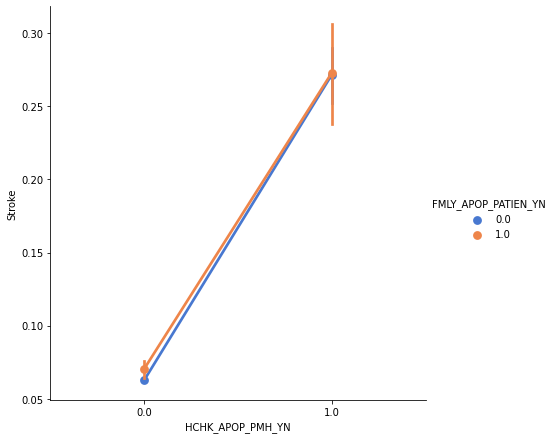

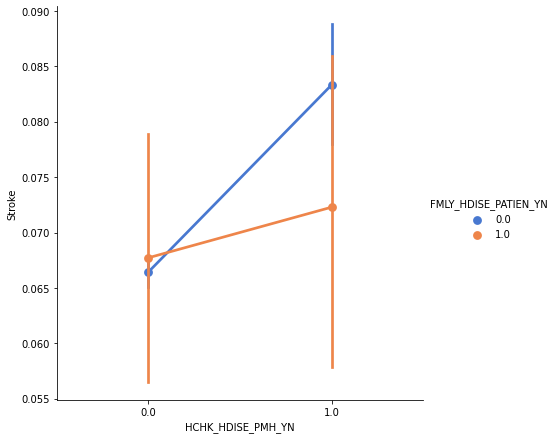

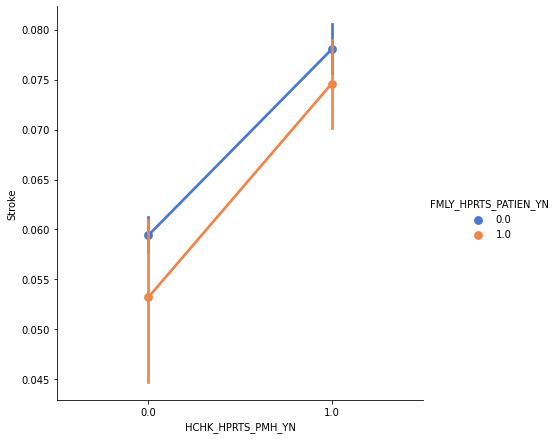

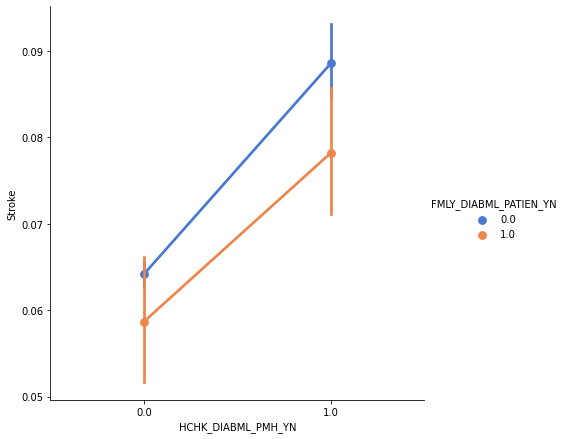

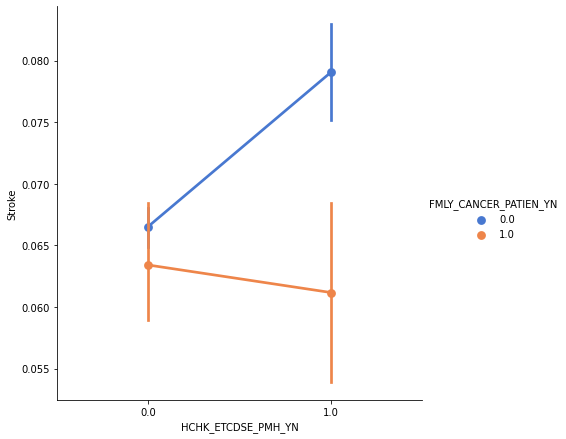

In [ ]:
#FMLY_~ (가족력 유무), 본인 과거병력유무
g = sns.factorplot(x='HCHK_APOP_PMH_YN', y='Stroke', hue='FMLY_APOP_PATIEN_YN',data=data, size=6, palette = 'muted')
g = sns.factorplot(x='HCHK_HDISE_PMH_YN', y='Stroke', hue='FMLY_HDISE_PATIEN_YN',data=data,  size=6, palette = 'muted')
g = sns.factorplot(x='HCHK_HPRTS_PMH_YN', y='Stroke', hue='FMLY_HPRTS_PATIEN_YN',data=data, size=6, palette = 'muted')
g = sns.factorplot(x='HCHK_DIABML_PMH_YN', y='Stroke', hue='FMLY_DIABML_PATIEN_YN',data=data, size=6, palette = 'muted')
g = sns.factorplot(x='HCHK_ETCDSE_PMH_YN', y='Stroke', hue='FMLY_CANCER_PATIEN_YN',data=data, size=6, palette = 'muted')


In [ ]:
data.loc[((data['HCHK_APOP_PMH_YN'] == 1) & (data['FMLY_APOP_PATIEN_YN'].isnull())), 'FMLY_APOP_PATIEN_YN'] = 1
data.loc[((data['HCHK_APOP_PMH_YN'] == 0) & (data['FMLY_APOP_PATIEN_YN'].isnull())), 'FMLY_APOP_PATIEN_YN'] = 0
data.loc[((data['HCHK_HDISE_PMH_YN'] == 1) & (data['FMLY_HDISE_PATIEN_YN'].isnull())), 'FMLY_HDISE_PATIEN_YN'] = 0
data.loc[((data['HCHK_HDISE_PMH_YN'] == 0) & (data['FMLY_HDISE_PATIEN_YN'].isnull())), 'FMLY_HDISE_PATIEN_YN'] = 1
data.loc[((data['HCHK_HPRTS_PMH_YN'] == 1) & (data['FMLY_HPRTS_PATIEN_YN'].isnull())), 'FMLY_HPRTS_PATIEN_YN'] = 0
data.loc[((data['HCHK_HPRTS_PMH_YN'] == 0) & (data['FMLY_HPRTS_PATIEN_YN'].isnull())), 'FMLY_HPRTS_PATIEN_YN'] = 0
data.loc[((data['HCHK_DIABML_PMH_YN'] == 1) & (data['FMLY_DIABML_PATIEN_YN'].isnull())), 'FMLY_DIABML_PATIEN_YN'] = 0
data.loc[((data['HCHK_DIABML_PMH_YN'] == 0) & (data['FMLY_DIABML_PATIEN_YN'].isnull())), 'FMLY_DIABML_PATIEN_YN'] = 0
data.loc[((data['HCHK_ETCDSE_PMH_YN'] == 1) & (data['FMLY_CANCER_PATIEN_YN'].isnull())), 'FMLY_CANCER_PATIEN_YN'] = 0
data.loc[((data['HCHK_ETCDSE_PMH_YN'] == 0) & (data['FMLY_CANCER_PATIEN_YN'].isnull())), 'FMLY_CANCER_PATIEN_YN'] = 0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update

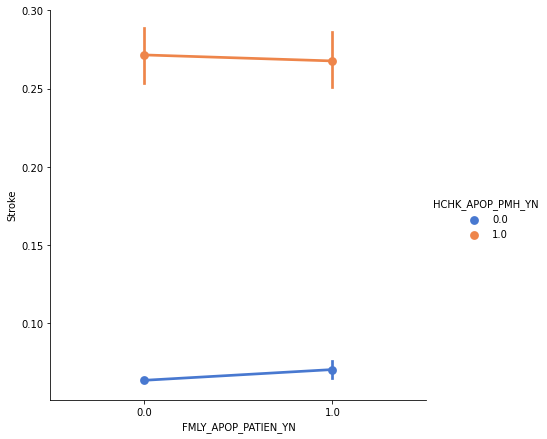

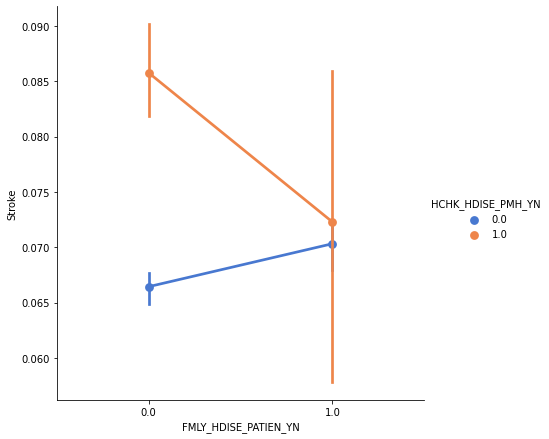

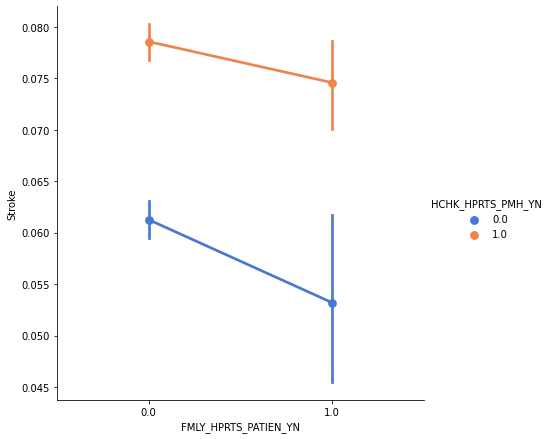

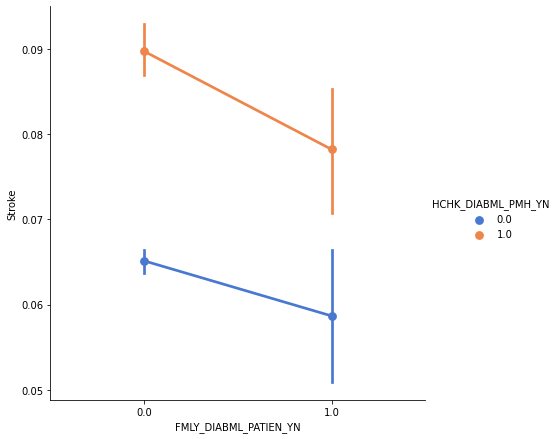

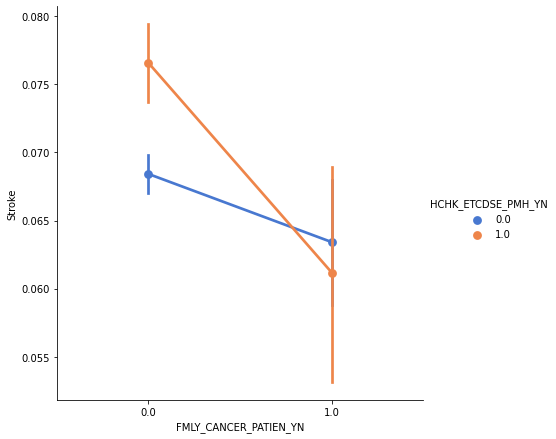

In [ ]:
g = sns.factorplot(x='FMLY_APOP_PATIEN_YN', y='Stroke', hue='HCHK_APOP_PMH_YN',data=data, size=6, palette = 'muted')
g = sns.factorplot(x='FMLY_HDISE_PATIEN_YN', y='Stroke', hue='HCHK_HDISE_PMH_YN',data=data,  size=6, palette = 'muted')
g = sns.factorplot(x='FMLY_HPRTS_PATIEN_YN', y='Stroke', hue='HCHK_HPRTS_PMH_YN',data=data, size=6, palette = 'muted')
g = sns.factorplot(x='FMLY_DIABML_PATIEN_YN', y='Stroke', hue='HCHK_DIABML_PMH_YN',data=data, size=6, palette = 'muted')
g = sns.factorplot(x='FMLY_CANCER_PATIEN_YN', y='Stroke', hue='HCHK_ETCDSE_PMH_YN',data=data, size=6, palette = 'muted')


In [ ]:
data.loc[((data['FMLY_APOP_PATIEN_YN'] == 1) & (data['HCHK_APOP_PMH_YN'].isnull())), 'HCHK_APOP_PMH_YN'] = 1
data.loc[((data['FMLY_APOP_PATIEN_YN'] == 0) & (data['HCHK_APOP_PMH_YN'].isnull())), 'HCHK_APOP_PMH_YN'] = 1
data.loc[((data['FMLY_HDISE_PATIEN_YN'] == 1) & (data['HCHK_HDISE_PMH_YN'].isnull())), 'HCHK_HDISE_PMH_YN'] = 1
data.loc[((data['FMLY_HDISE_PATIEN_YN'] == 0) & (data['HCHK_HDISE_PMH_YN'].isnull())), 'HCHK_HDISE_PMH_YN'] = 1
data.loc[((data['FMLY_HPRTS_PATIEN_YN'] == 1) & (data['HCHK_HPRTS_PMH_YN'].isnull())), 'FMLY_HPRTS_PATIEN_YN'] = 1
data.loc[((data['FMLY_HPRTS_PATIEN_YN'] == 0) & (data['HCHK_HPRTS_PMH_YN'].isnull())), 'FMLY_HPRTS_PATIEN_YN'] = 1
data.loc[((data['FMLY_DIABML_PATIEN_YN'] == 1) & (data['HCHK_DIABML_PMH_YN'].isnull())), 'HCHK_DIABML_PMH_YN'] = 0
data.loc[((data['FMLY_DIABML_PATIEN_YN'] == 0) & (data['HCHK_DIABML_PMH_YN'].isnull())), 'HCHK_DIABML_PMH_YN'] = 0
data.loc[((data['FMLY_CANCER_PATIEN_YN'] == 1) & (data['HCHK_ETCDSE_PMH_YN'].isnull())), 'HCHK_ETCDSE_PMH_YN'] = 0
data.loc[((data['FMLY_CANCER_PATIEN_YN'] == 0) & (data['HCHK_ETCDSE_PMH_YN'].isnull())), 'HCHK_ETCDSE_PMH_YN'] = 1


In [ ]:
#가족력, 본인과거병력 모두 NaN
data['HCHK_APOP_PMH_YN'].fillna(0, inplace=True)
data['HCHK_HDISE_PMH_YN'].fillna(0, inplace=True)
data['HCHK_HPRTS_PMH_YN'].fillna(0, inplace=True)
data['HCHK_DIABML_PMH_YN'].fillna(0, inplace=True)
data['HCHK_ETCDSE_PMH_YN'].fillna(0, inplace=True)
data['FMLY_APOP_PATIEN_YN'].fillna(0, inplace=True)
data['FMLY_HDISE_PATIEN_YN'].fillna(0, inplace=True)
data['FMLY_HPRTS_PATIEN_YN'].fillna(0, inplace=True)
data['FMLY_DIABML_PATIEN_YN'].fillna(0, inplace=True)
data['FMLY_CANCER_PATIEN_YN'].fillna(0, inplace=True)


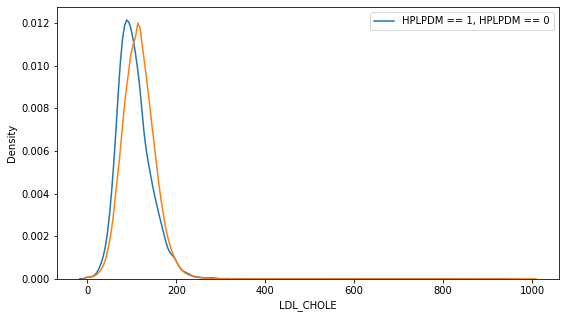

In [ ]:
#HCHK_HPLPDM_PMH_YN
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data[data['HCHK_HPLPDM_PMH_YN'] == 1]['LDL_CHOLE'])
sns.kdeplot(data[data['HCHK_HPLPDM_PMH_YN'] == 0]['LDL_CHOLE'])
plt.legend(['HPLPDM == 1, HPLPDM == 0'])

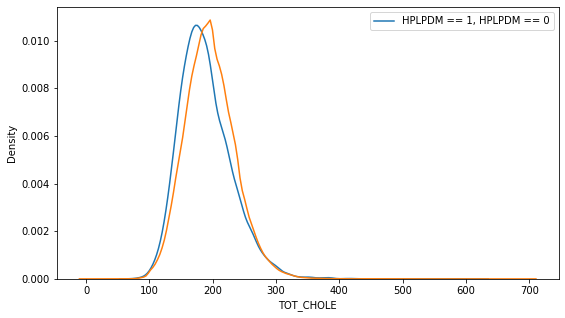

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data[data['HCHK_HPLPDM_PMH_YN'] == 1]['TOT_CHOLE'])
sns.kdeplot(data[data['HCHK_HPLPDM_PMH_YN'] == 0]['TOT_CHOLE'])
plt.legend(['HPLPDM == 1, HPLPDM == 0'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


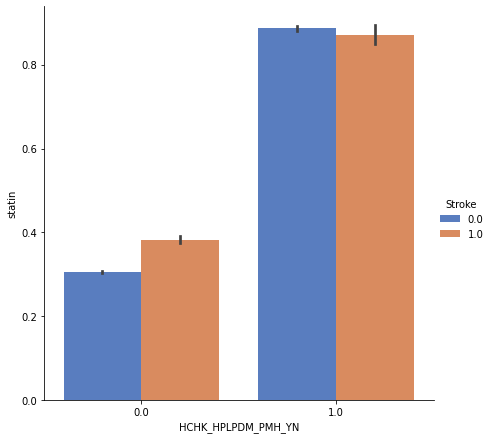

In [ ]:
#HCHK_HPLPDM_PMH_YN
g = sns.factorplot(x='HCHK_HPLPDM_PMH_YN', y='statin', hue='Stroke',data=data, size=6, kind='bar', palette = 'muted')


In [ ]:
data.loc[((data['statin'] == 1) & (data['HCHK_HPLPDM_PMH_YN'].isnull())), 'HCHK_HPLPDM_PMH_YN'] = 1
data.loc[((data['statin'] == 0) & (data['HCHK_HPLPDM_PMH_YN'].isnull())), 'HCHK_HPLPDM_PMH_YN'] = 0

In [ ]:
data['HCHK_HPLPDM_PMH_YN'].isnull().sum()

0

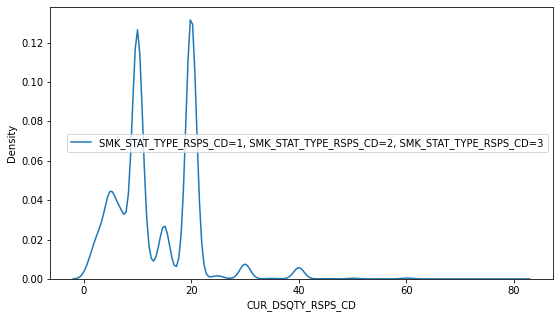

In [ ]:
#흡연
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data[data['SMK_STAT_TYPE_RSPS_CD'] == 1]['CUR_DSQTY_RSPS_CD'])
sns.kdeplot(data[data['SMK_STAT_TYPE_RSPS_CD'] == 2]['CUR_DSQTY_RSPS_CD'])
sns.kdeplot(data[data['SMK_STAT_TYPE_RSPS_CD'] == 3]['CUR_DSQTY_RSPS_CD'])
plt.legend(['SMK_STAT_TYPE_RSPS_CD=1, SMK_STAT_TYPE_RSPS_CD=2, SMK_STAT_TYPE_RSPS_CD=3'])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


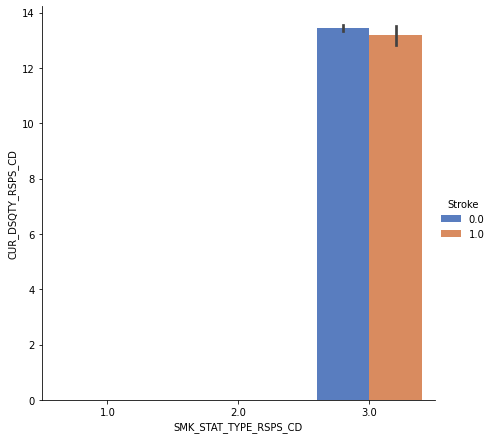

In [ ]:
#흡연관련 데이터
g = sns.factorplot(x='SMK_STAT_TYPE_RSPS_CD', y='CUR_DSQTY_RSPS_CD', hue='Stroke',data=data, size=6, kind='bar', palette = 'muted')

In [ ]:
#안 피우는 사람 현재 흡연기간, 흡연량 0으로
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 3) & (data['CUR_DSQTY_RSPS_CD'].isnull())), 'CUR_DSQTY_RSPS_CD'].isnull().sum()

0

In [ ]:
#안 피우는 사람 현재 흡연기간, 흡연량 0으로
data['CUR_DSQTY_RSPS_CD'].fillna(0, inplace=True)

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 3) & (data['CUR_SMK_TERM_RSPS_CD'].isnull())), 'CUR_SMK_TERM_RSPS_CD'].isnull().sum()

0

In [ ]:
data['CUR_SMK_TERM_RSPS_CD'].fillna(0, inplace=True)

In [ ]:
#과거 흡연기간

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


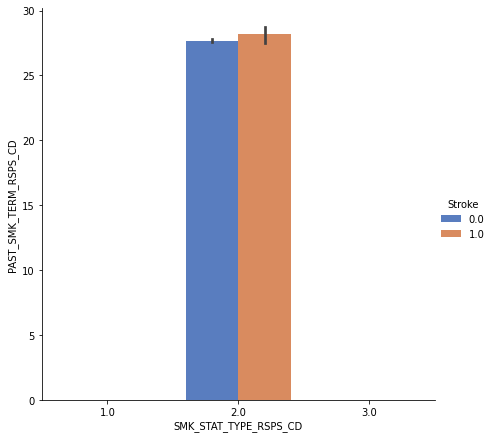

In [ ]:
g = sns.factorplot(x='SMK_STAT_TYPE_RSPS_CD', y='PAST_SMK_TERM_RSPS_CD', hue='Stroke',data=data, size=6, kind='bar', palette = 'muted')

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'].isnull().sum()

1512

In [ ]:
data['PAST_SMK_TERM_RSPS_CD'].describe()

count    34211.000000
mean        27.717167
std         14.023486
min          1.000000
25%         20.000000
50%         30.000000
75%         40.000000
max         80.000000
Name: PAST_SMK_TERM_RSPS_CD, dtype: float64

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'] = 28.0

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'].isnull().sum()

0

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 3) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'].isnull().sum()

27322

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 3) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD']= 0.0

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 3) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'].isnull().sum()

0

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 1) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'].isnull().sum()

181126

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 1) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'] = 0

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 1) & (data['PAST_SMK_TERM_RSPS_CD'].isnull())), 'PAST_SMK_TERM_RSPS_CD'].isnull().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


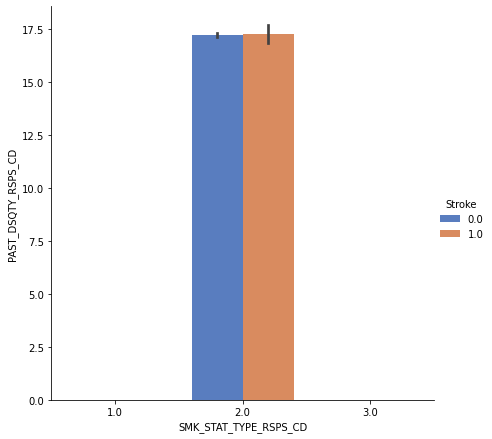

In [ ]:
#과거 하루흡연량
g = sns.factorplot(x='SMK_STAT_TYPE_RSPS_CD', y='PAST_DSQTY_RSPS_CD', hue='Stroke',data=data, size=6, kind='bar', palette = 'muted')

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['PAST_DSQTY_RSPS_CD'].isnull())), 'PAST_DSQTY_RSPS_CD'].isnull().sum()

1512

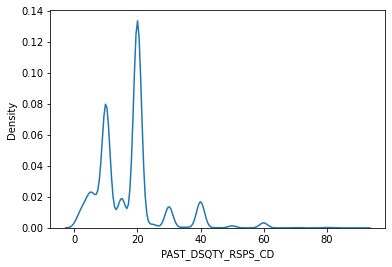

In [ ]:
sns.kdeplot(data[data['SMK_STAT_TYPE_RSPS_CD'] == 2]['PAST_DSQTY_RSPS_CD'])

In [ ]:
data['PAST_DSQTY_RSPS_CD'].describe()

count    34211.000000
mean        17.221829
std         10.161867
min          1.000000
25%         10.000000
50%         20.000000
75%         20.000000
max         90.000000
Name: PAST_DSQTY_RSPS_CD, dtype: float64

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['PAST_DSQTY_RSPS_CD'].isnull())), 'PAST_DSQTY_RSPS_CD'] = 17.0

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['PAST_DSQTY_RSPS_CD'].isnull())), 'PAST_DSQTY_RSPS_CD'].isnull().sum()

0

In [ ]:
data['PAST_DSQTY_RSPS_CD'].fillna(0, inplace=True)

In [ ]:
data['PAST_DSQTY_RSPS_CD'].isnull().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


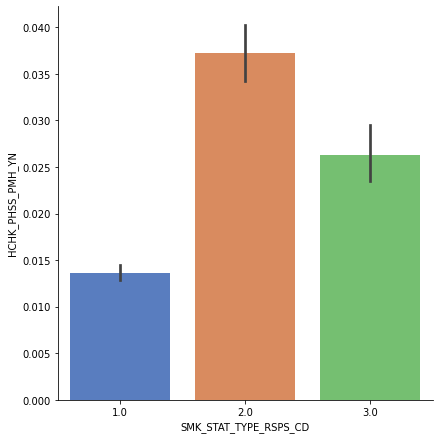

In [ ]:
#HCHK_PHSS_PMH_YN
g = sns.factorplot(x='SMK_STAT_TYPE_RSPS_CD', y='HCHK_PHSS_PMH_YN',data=data, size=6, kind='bar', palette = 'muted')

In [ ]:
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 2) & (data['HCHK_PHSS_PMH_YN'].isnull())), 'HCHK_PHSS_PMH_YN'] = 1
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 1) & (data['HCHK_PHSS_PMH_YN'].isnull())), 'HCHK_PHSS_PMH_YN'] = 0
data.loc[((data['SMK_STAT_TYPE_RSPS_CD'] == 3) & (data['HCHK_PHSS_PMH_YN'].isnull())), 'HCHK_PHSS_PMH_YN'] = 0

In [ ]:
data['HCHK_PHSS_PMH_YN'].isnull().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


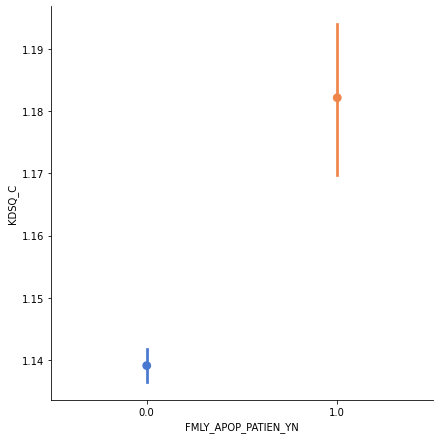

In [ ]:
#KDSQ_C와 FMLY_APOP_PATIEN_YN, HCHK_APOP_PMH_YN
g = sns.factorplot(x='FMLY_APOP_PATIEN_YN', y='KDSQ_C',data=data, size=6, palette = 'muted')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


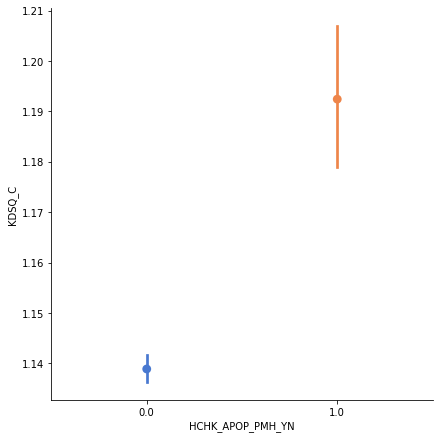

In [ ]:
g = sns.factorplot(x='HCHK_APOP_PMH_YN', y='KDSQ_C',data=data, size=6, palette = 'muted')

In [ ]:
data.loc[(((data['HCHK_APOP_PMH_YN'] == 1) | (data['FMLY_APOP_PATIEN_YN'] == 1)) & data['KDSQ_C'].isnull()), 'KDSQ_C'].isnull().sum()

13838

In [ ]:
data.loc[(((data['HCHK_APOP_PMH_YN'] == 1) | (data['FMLY_APOP_PATIEN_YN'] == 1)) & data['KDSQ_C'].isnull()), 'KDSQ_C'] = 2

In [ ]:
data.loc[(((data['HCHK_APOP_PMH_YN'] == 0) & (data['FMLY_APOP_PATIEN_YN'] == 0)) & data['KDSQ_C'].isnull()), 'KDSQ_C'].isnull().sum()

166063

In [ ]:
data.loc[(((data['HCHK_APOP_PMH_YN'] == 0) & (data['FMLY_APOP_PATIEN_YN'] == 0)) & data['KDSQ_C'].isnull()), 'KDSQ_C'] = 1

In [ ]:
data['KDSQ_C'].isnull().sum()

0

In [ ]:
#KDSQ_C와 KDSQ_C_1, 2, 3, 4, 5 비교

In [ ]:
#KDSQ_C_1
data.groupby('KDSQ_C')['KDSQ_C_1'].describe()

,count,mean,std,min,25%,50%,75%,max
KDSQ_C,,,,,,,,
1.0,55268.0,1.128103,0.339472,1.0,1.0,1.0,1.0,3.0
2.0,9104.0,2.083919,0.481434,1.0,2.0,2.0,2.0,3.0


In [ ]:
data['KDSQ_C_1'].isnull().sum()

179799

In [ ]:
data.loc[((data['KDSQ_C'] == 1) & (data['KDSQ_C_1'].isnull())), 'KDSQ_C_1'] = 1
data.loc[((data['KDSQ_C'] == 2) & (data['KDSQ_C_1'].isnull())), 'KDSQ_C_1'] = 2
data['KDSQ_C_1'].isnull().sum()

0

In [ ]:
#KDSQ_C_2
data.groupby('KDSQ_C')['KDSQ_C_2'].describe()

,count,mean,std,min,25%,50%,75%,max
KDSQ_C,,,,,,,,
1.0,55337.0,1.246002,0.438130,1.0,1.0,1.0,1.0,3.0
2.0,9106.0,2.170108,0.424601,1.0,2.0,2.0,2.0,3.0


In [ ]:
data.loc[((data['KDSQ_C'] == 1) & (data['KDSQ_C_2'].isnull())), 'KDSQ_C_2'] = 1
data.loc[((data['KDSQ_C'] == 2) & (data['KDSQ_C_2'].isnull())), 'KDSQ_C_2'] = 2
data['KDSQ_C_2'].isnull().sum()

0

In [ ]:
#KDSQ_C_3

In [ ]:
data.groupby('KDSQ_C')['KDSQ_C_3'].describe()

,count,mean,std,min,25%,50%,75%,max
KDSQ_C,,,,,,,,
1.0,55326.0,1.085222,0.280506,1.0,1.0,1.0,1.0,3.0
2.0,9102.0,2.051307,0.445594,1.0,2.0,2.0,2.0,3.0


In [ ]:
data.loc[((data['KDSQ_C'] == 1) & (data['KDSQ_C_3'].isnull())), 'KDSQ_C_3'] = 1
data.loc[((data['KDSQ_C'] == 2) & (data['KDSQ_C_3'].isnull())), 'KDSQ_C_3'] = 2
data['KDSQ_C_3'].isnull().sum()

0

In [ ]:
#KDSQ_C_4
data.groupby('KDSQ_C')['KDSQ_C_4'].describe()

,count,mean,std,min,25%,50%,75%,max
KDSQ_C,,,,,,,,
1.0,55323.0,1.036260,0.187806,1.0,1.0,1.0,1.0,3.0
2.0,9103.0,1.903548,0.517685,1.0,2.0,2.0,2.0,3.0


In [ ]:
data.loc[((data['KDSQ_C'] == 1) & (data['KDSQ_C_4'].isnull())), 'KDSQ_C_4'] = 1
data.loc[((data['KDSQ_C'] == 2) & (data['KDSQ_C_4'].isnull())), 'KDSQ_C_4'] = 2
data['KDSQ_C_4'].isnull().sum()

0

In [ ]:
#KDSQ_C_5
data.groupby('KDSQ_C')['KDSQ_C_5'].describe()

,count,mean,std,min,25%,50%,75%,max
KDSQ_C,,,,,,,,
1.0,55302.0,1.094499,0.294987,1.0,1.0,1.0,1.0,3.0
2.0,9099.0,2.024398,0.439901,1.0,2.0,2.0,2.0,3.0


In [ ]:
data.loc[((data['KDSQ_C'] == 1) & (data['KDSQ_C_5'].isnull())), 'KDSQ_C_5'] = 1
data.loc[((data['KDSQ_C'] == 2) & (data['KDSQ_C_5'].isnull())), 'KDSQ_C_5'] = 2
data['KDSQ_C_5'].isnull().sum()

0

In [ ]:
missing_values = missing_values_table(data)

Your selected dataframe has 65 columns. 
There are 0 columns that have missing values.


In [ ]:
#Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
train, test = train_test_split(data, test_size=0.2)


In [ ]:

X_train = train.drop('Stroke', axis=1).values
target_label = train['Stroke'].values
X_test = test.values


In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

ValueError: ignored

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
nb = GaussianNB()
nb.fit(X_tr, y_tr)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_tr, y_tr)

In [ ]:
rf_probs = rf.predict_proba(X_vld)
nb_probs = nb.predict_proba(X_vld)
knn_probs = knn.predict_proba(X_vld)
dtc_probs = dtc.predict_proba(X_vld)

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]

In [ ]:
rf_auc = roc_auc_score(y_vld, rf_probs)
nb_auc = roc_auc_score(y_vld, nb_probs)
knn_auc = roc_auc_score(y_vld, knn_probs)
dtc_auc = roc_auc_score(y_vld, dtc_probs)

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_vld, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_vld, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_vld, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_vld, dtc_probs)

In [ ]:
print("Random Forest: AUROC = %.3f" % (rf_auc))
print("knn: AUROC = %.3f" % (knn_auc))
print("Navie Bayes: AUROC = %.3f" % (nb_auc))

Random Forest: AUROC = 0.663
knn: AUROC = 0.546
Navie Bayes: AUROC = 0.631


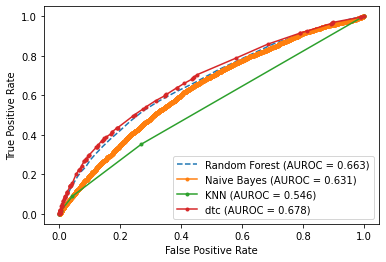

In [ ]:
plt.plot(rf_fpr, rf_tpr, linestyle='--', label = 'Random Forest (AUROC = %.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label = 'KNN (AUROC = %.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label = 'dtc (AUROC = %.3f)' % dtc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

,SEX,AGE,SIDO,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,DFAB_GRD_CD,DFAB_PTN_CD,Stroke,AF,CAD,Cancer,DM,HF,HTN,aad,anticoagulant,antiplatelet_agent,cardiotonics,statin,HCHK_YEAR,HME_DT,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,HCHK_APOP_PMH_YN,HCHK_DIABML_PMH_YN,HCHK_ETCDSE_PMH_YN,HCHK_HDISE_PMH_YN,HCHK_HPLPDM_PMH_YN,HCHK_HPRTS_PMH_YN,HCHK_PHSS_PMH_YN,FMLY_APOP_PATIEN_YN,FMLY_CANCER_PATIEN_YN,FMLY_DIABML_PATIEN_YN,FMLY_HDISE_PATIEN_YN,FMLY_HPRTS_PATIEN_YN,SMK_STAT_TYPE_RSPS_CD,PAST_SMK_TERM_RSPS_CD,PAST_DSQTY_RSPS_CD,CUR_SMK_TERM_RSPS_CD,CUR_DSQTY_RSPS_CD,DRNK_HABIT_RSPS_CD,TM1_DRKQTY_RSPS_CD,MOV20_WEK_FREQ_ID,MOV30_WEK_FREQ_ID,WLK30_WEK_FREQ_ID,KDSQ_C,KDSQ_C_1,KDSQ_C_2,KDSQ_C_3,KDSQ_C_4,KDSQ_C_5
39596,2,80,44,6,3,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2010,20100305.0,142.0,52.0,83.0,102.0,60.0,89.0,211.0,232.0,51.0,114.0,14.4,1.0,0.7,19.0,19.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
159332,2,70,47,1,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,20090519.0,148.0,45.0,76.0,124.0,81.0,85.0,267.0,199.0,60.0,167.0,12.7,1.0,0.6,23.0,13.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
15441,2,68,27,6,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2010,20100517.0,151.0,49.0,78.0,130.0,80.0,97.0,164.0,185.0,35.0,92.0,13.7,1.0,0.6,24.0,23.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
132680,2,72,31,5,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,20100820.0,147.0,46.0,70.0,118.0,68.0,95.0,185.0,68.0,67.0,104.0,11.6,1.0,0.9,29.0,19.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0
135905,2,74,26,1,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012,20120423.0,153.0,51.0,76.0,130.0,70.0,88.0,222.0,94.0,76.0,127.0,13.6,1.0,0.5,22.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0


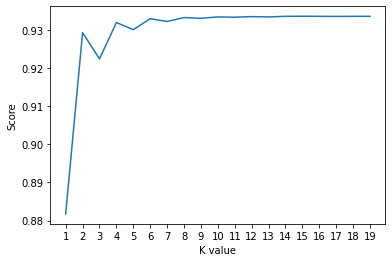

Maximum KNN Score is 93.36%


In [ ]:
#KNeighbors
scoreList = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    scoreList.append(knn.score(X_vld, y_vld))

plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

accuracies = {}
acc = max(scoreList) * 100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 8)
dtc.fit(X_tr, y_tr)
prediction = model.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 51276명 중 93.36% 정확도로 생존을 맞춤
